In [7]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data getting, cleaning, and exploring
import wrangle as w
import explore as ex
import modeling as m

# Python without these is hard
import pandas as pd
import numpy as np
from pydataset import data
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
# Regression Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = w.wrangle_zillow(cached=True)

In [3]:
a = pd.DataFrame(df.columns)
a

0
0      heating_system_type_id
1                   bathrooms
2                    bedrooms
3                   prop_sqft
4                        fips
5               fireplace_cnt
6                    latitude
7                   longitude
8                    lot_sqft
9                    pool_cnt
10             region_id_city
11                 year_built
12             fireplace_flag
13           struct_tax_value
14                  tax_value
15             land_tax_value
16                 tax_amount
17                  log_error
18        heating_system_desc
19                    la_cnty
20                orange_cnty
21               ventura_cnty
22            log_error_class
23                        age
24                    age_bin
25                    taxrate
26                      acres
27                  acres_bin
28                   sqft_bin
29  structure_dollar_per_sqft
30  structure_dollar_sqft_bin
31       land_dollar_per_sqft
32        lot_dollar_sqft_bin
33             bath_bed_ratio
34                       cola

In [4]:
df.shape

(60240, 35)

In [5]:
w.missing_zero_values_table(df)

Your selected dataframe has 35 columns and 60240 Rows.
There are 0 columns that have NULL values.


Zero Values  NULL Values  % of Total NULL Values  \
heating_system_type_id               0            0                     0.0   
acres                                0            0                     0.0   
orange_cnty                      42482            0                     0.0   
ventura_cnty                     54661            0                     0.0   
log_error_class                      0            0                     0.0   
age                                  0            0                     0.0   
age_bin                            668            0                     0.0   
taxrate                              0            0                     0.0   
acres_bin                         6327            0                     0.0   
heating_system_desc                  0            0                     0.0   
sqft_bin                          2200            0                     0.0   
structure_dollar_per_sqft            0            0                     0.0   
structure_dollar_sqft_bin         2461            0                     0.0   
land_dollar_per_sqft                 0            0                     0.0   
lot_dollar_sqft_bin                353            0                     0.0   
bath_bed_ratio                       0            0                     0.0   
la_cnty                          23337            0                     0.0   
log_error                            0            0                     0.0   
bathrooms                            0            0                     0.0   
lot_sqft                             0            0                     0.0   
bedrooms                             0            0                     0.0   
prop_sqft                            0            0                     0.0   
fips                                 0            0                     0.0   
fireplace_cnt                    52382            0                     0.0   
latitude                             0            0                     0.0   
longitude                            0            0                     0.0   
pool_cnt                         49397            0                     0.0   
tax_amount                           0            0                     0.0   
region_id_city                       0            0                     0.0   
year_built                           0            0                     0.0   
fireplace_flag                   52382            0                     0.0   
struct_tax_value                     0            0                     0.0   
tax_value                            0            0                     0.0   
land_tax_value                       0            0                     0.0   
cola                             47515            0                     0.0   

                           Total Zero's plus NULL Values  \
heating_system_type_id                                 0   
acres                                                  0   
orange_cnty                                        42482   
ventura_cnty                                       54661   
log_error_class                                        0   
age                                                    0   
age_bin                                              668   
taxrate                                                0   
acres_bin                                           6327   
heating_system_desc                                    0   
sqft_bin                                            2200   
structure_dollar_per_sqft                              0   
structure_dollar_sqft_bin                           2461   
land_dollar_per_sqft                                   0   
lot_dollar_sqft_bin                                  353   
bath_bed_ratio                                         0   
la_cnty                                            23337   
log_error                                              0   
bathrooms                                 

In [6]:
binary_vars = ['pool_cnt', 'fireplace_flag','la_cnty', 'orange_cnty', 'ventura_cnty', 'cola']
categorical_vars = ['heating_system_type_id', 'fips', 'fireplace_cnt', \
                    'heating_system_desc', 'region_id_city', 'acres_bin', 'sqft_bin',\
                    'structure_dollar_sqft_bin']
quant_vars = [ 'bathrooms', 'bedrooms', 'prop_sqft', 'lot_sqft', 'year_built',\
              'struct_tax_value', 'tax_value', 'land_tax_value', 'tax_amount', \
              'structure_dollar_per_sqft', 'bath_bed_ratio']
categorical_target = 'log_error_class'
continuous_target = 'log_error'

In [7]:
train, validate, test = w.train_validate_test_split(df, 'log_error', seed=42)

In [8]:
train, validate, test = w.train_validate_test_scale(train, validate, test, quant_vars)

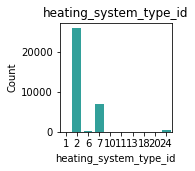

    heating_system_type_id  Count  Percent
2                        2  25910    76.81
7                        7   7104    21.06
6                       24    356     1.06
24                       6    265     0.79
20                      13     51     0.15
13                      20     29     0.09
18                       1      8     0.02
1                       18      8     0.02
10                      10      2     0.01
11                      11      1     0.00
_________________________________________________________________


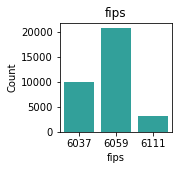

      fips  Count  Percent
6037  6059  20732    61.46
6059  6037   9908    29.37
6111  6111   3094     9.17
_________________________________________________________________


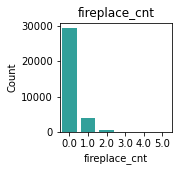

     fireplace_cnt  Count  Percent
0.0            0.0  29311    86.89
1.0            1.0   3845    11.40
2.0            2.0    483     1.43
3.0            4.0     86     0.25
4.0            3.0      8     0.02
5.0            5.0      1     0.00
_________________________________________________________________


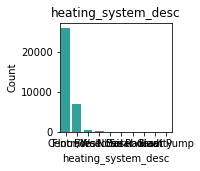

           heating_system_desc  Count  Percent
Central                Central  25910    76.81
Floor/Wall          Floor/Wall   7104    21.06
Forced air                 Yes    356     1.06
Yes                 Forced air    265     0.79
Solar                     None     51     0.15
None                     Solar     29     0.09
Radiant              Baseboard      8     0.02
Baseboard              Radiant      8     0.02
Gravity                Gravity      2     0.01
Heat Pump            Heat Pump      1     0.00
_________________________________________________________________


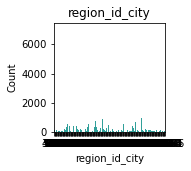

       region_id_city  Count  Percent
12447           37086   7102    21.05
46298           26964   1098     3.25
5534            52650    984     2.92
52650           30908    856     2.54
40227           12447    789     2.34
...               ...    ...      ...
6822            53206      1     0.00
34037           13232      1     0.00
53162           34037      1     0.00
50569           38334      1     0.00
31134            6822      1     0.00

[182 rows x 3 columns]
_________________________________________________________________


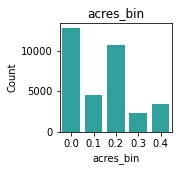

     acres_bin  Count  Percent
0.2        0.0  12748    37.79
0.1        0.2  10685    31.67
0.3        0.1   4543    13.47
0.0        0.4   3492    10.35
0.4        0.3   2266     6.72
_________________________________________________________________


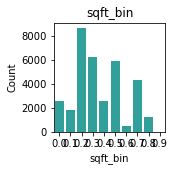

     sqft_bin  Count  Percent
0.4       0.2   8607    25.51
0.3       0.3   6265    18.57
0.2       0.5   5888    17.45
0.5       0.7   4293    12.73
0.1       0.4   2587     7.67
0.6       0.0   2533     7.51
0.7       0.1   1857     5.50
0.0       0.8   1228     3.64
0.8       0.6    473     1.40
0.9       0.9      3     0.01
_________________________________________________________________


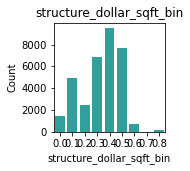

     structure_dollar_sqft_bin  Count  Percent
0.4                        0.4   9480    28.10
0.3                        0.5   7647    22.67
0.2                        0.3   6822    20.22
0.1                        0.1   4915    14.57
0.5                        0.2   2501     7.41
0.0                        0.0   1434     4.25
0.6                        0.6    760     2.25
0.7                        0.8    160     0.47
0.8                        0.7     15     0.04
_________________________________________________________________


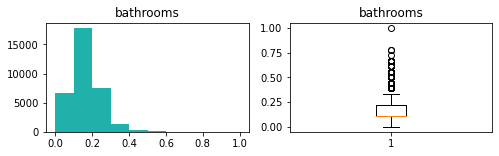

count    33734.000000
mean         0.134651
std          0.093924
min          0.000000
25%          0.111111
50%          0.111111
75%          0.222222
max          1.000000
Name: bathrooms, dtype: float64


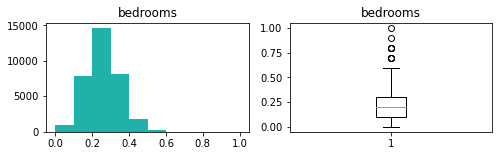

count    33734.000000
mean         0.209080
std          0.094858
min          0.000000
25%          0.100000
50%          0.200000
75%          0.300000
max          1.000000
Name: bedrooms, dtype: float64


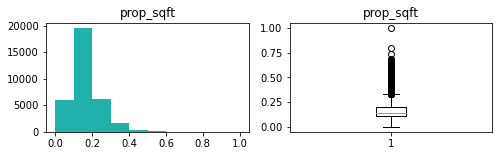

count    33734.000000
mean         0.163299
std          0.077436
min          0.000000
25%          0.109806
50%          0.144433
75%          0.197855
max          1.000000
Name: prop_sqft, dtype: float64


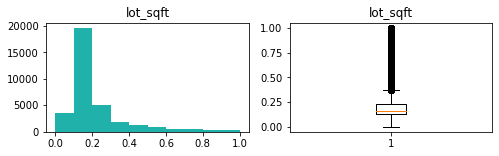

count    33734.000000
mean         0.217540
std          0.169359
min          0.000000
25%          0.130128
50%          0.164133
75%          0.228822
max          1.000000
Name: lot_sqft, dtype: float64


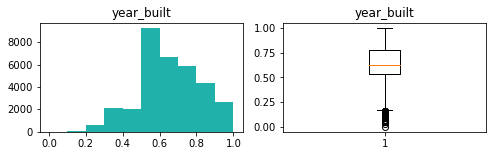

count    33734.000000
mean         0.646322
std          0.169578
min          0.000000
25%          0.536232
50%          0.630435
75%          0.782609
max          1.000000
Name: year_built, dtype: float64


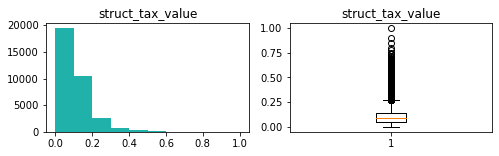

count    33734.000000
mean         0.108877
std          0.084121
min          0.000000
25%          0.053177
50%          0.086812
75%          0.138682
max          1.000000
Name: struct_tax_value, dtype: float64


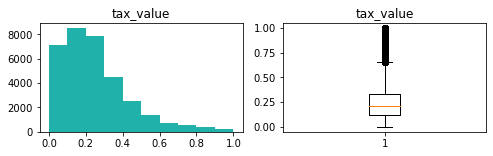

count    33734.000000
mean         0.250581
std          0.184274
min          0.000000
25%          0.116572
50%          0.214280
75%          0.332705
max          1.000000
Name: tax_value, dtype: float64


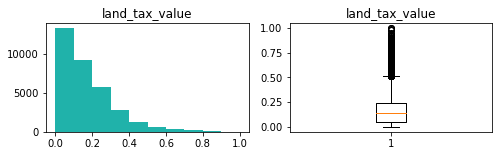

count    33734.000000
mean         0.167595
std          0.145532
min          0.000000
25%          0.052515
50%          0.135707
75%          0.237726
max          1.000000
Name: land_tax_value, dtype: float64


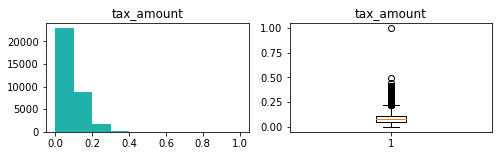

count    33734.000000
mean         0.087470
std          0.060761
min          0.000000
25%          0.044507
50%          0.074966
75%          0.113538
max          1.000000
Name: tax_amount, dtype: float64


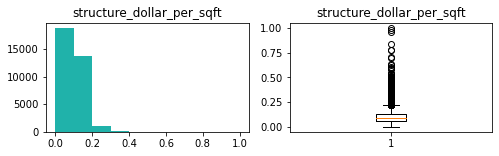

count    33734.000000
mean         0.099624
std          0.054973
min          0.000000
25%          0.063248
50%          0.093336
75%          0.127033
max          1.000000
Name: structure_dollar_per_sqft, dtype: float64


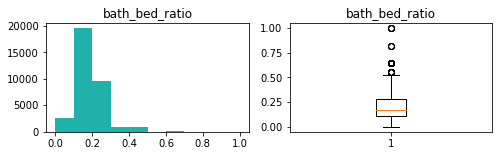

count    33734.000000
mean         0.193771
std          0.095268
min          0.000000
25%          0.107143
50%          0.166667
75%          0.285714
max          1.000000
Name: bath_bed_ratio, dtype: float64


In [9]:
ex.explore_univariate(train, categorical_vars, quant_vars)

pool_cnt 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=87997080.5, pvalue=1.3267458963794445e-08)
        chi2       p-value  degrees of freedom
0  47.346197  2.933493e-10                   3

expected:
              0            1            2            3
0  6926.525167  6995.380566  6929.803996  6800.290271
1  1523.474833  1538.619434  1524.196004  1495.709729


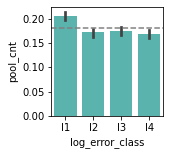


_____________________

fireplace_flag 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=64068624.0, pvalue=0.21249831712877565)
        chi2       p-value  degrees of freedom
0  50.326362  6.807584e-11                   3

expected:
              0            1            2            3
0  7342.086619  7415.073042  7345.562163  7208.278176
1  1107.913381  1118.926958  1108.437837  1087.721824


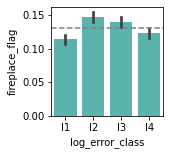


_____________________

la_cnty 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=137912549.0, pvalue=0.0003182613425983845)
         chi2       p-value  degrees of freedom
0  328.014803  8.584110e-71                   3

expected:
              0           1            2            3
0  3256.859548  3289.23543  3258.401257  3197.503765
1  5193.140452  5244.76457  5195.598743  5098.496235


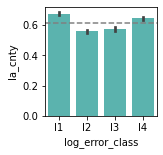


_____________________

orange_cnty 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=115817424.0, pvalue=0.006510145490682447)
        chi2       p-value  degrees of freedom
0  269.79682  3.415263e-58                   3

expected:
              0            1            2            3
0  5968.153791  6027.482184  5970.978953  5859.385071
1  2481.846209  2506.517816  2483.021047  2436.614929


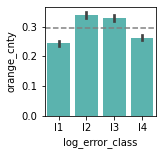


_____________________

ventura_cnty 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=46482843.0, pvalue=0.07560888678827839)
        chi2   p-value  degrees of freedom
0  23.955566  0.000026                   3

expected:
             0            1           2            3
0  7674.98666  7751.282386  7678.61979  7535.111164
1   775.01334   782.717614   775.38021   760.888836


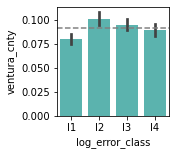


_____________________

cola 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=96685341.5, pvalue=0.0037242555214341343)
         chi2       p-value  degrees of freedom
0  358.637602  2.010519e-77                   3

expected:
              0            1            2            3
0  6671.026264  6737.341792  6674.184147  6549.447797
1  1778.973736  1796.658208  1779.815853  1746.552203


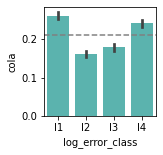


_____________________

bathrooms 
____________________



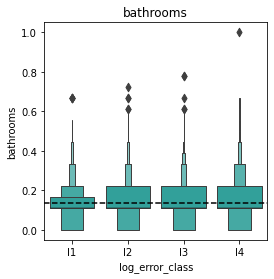

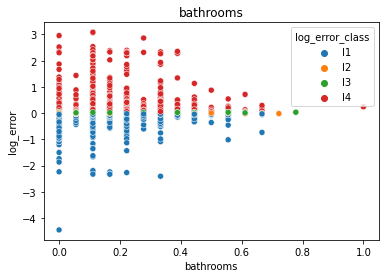

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.123281     0.136103     0.140045     0.139244
std                 0.092577     0.087873     0.089853     0.103876
min                 0.000000     0.000000     0.000000     0.000000
25%                 0.111111     0.111111     0.111111     0.111111
50%                 0.111111     0.111111     0.111111     0.111111
75%                 0.166667     0.222222     0.222222     0.222222
max                 0.666667     0.722222     0.777778     1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.055025245922495566, pvalue=4.804765041658385e-24)

____________________

bedrooms 
____________________



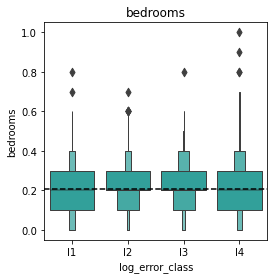

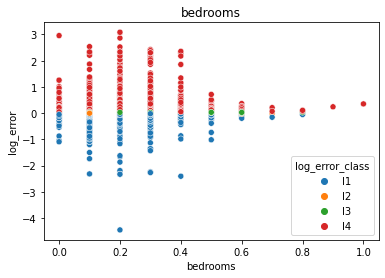

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.199018     0.210698     0.213532     0.213127
std                 0.092019     0.090801     0.094352     0.101347
min                 0.000000     0.000000     0.000000     0.000000
25%                 0.100000     0.200000     0.200000     0.100000
50%                 0.200000     0.200000     0.200000     0.200000
75%                 0.300000     0.300000     0.300000     0.300000
max                 0.800000     0.700000     0.800000     1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.050576736525608665, pvalue=1.4728721870184677e-20)

____________________

prop_sqft 
____________________



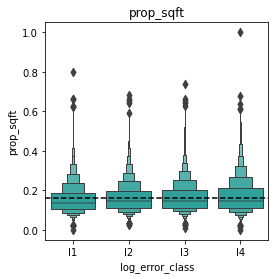

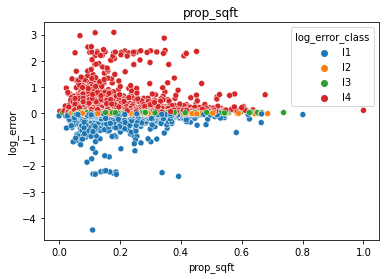

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.155129     0.161555     0.165585     0.171085
std                 0.074033     0.072653     0.075072     0.086557
min                 0.000000     0.027477     0.011440     0.002451
25%                 0.104928     0.110521     0.113381     0.111134
50%                 0.137283     0.144791     0.147651     0.149234
75%                 0.185061     0.195914     0.200613     0.211236
max                 0.801021     0.685291     0.737487     1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.06698126041850155, pvalue=7.456353383828937e-35)

____________________

lot_sqft 
____________________



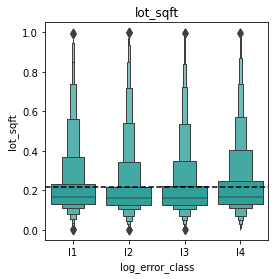

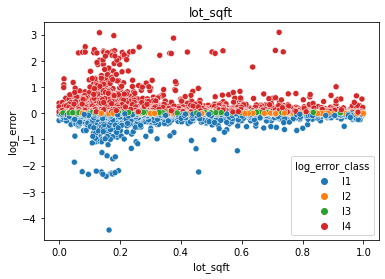

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.220624     0.210963     0.212243     0.226562
std                 0.170144     0.165454     0.165447     0.175887
min                 0.000000     0.000000     0.000000     0.000000
25%                 0.132968     0.128037     0.127881     0.131913
50%                 0.165493     0.162285     0.162709     0.168077
75%                 0.231237     0.217687     0.223179     0.246317
max                 0.999026     1.000000     0.997129     0.998951 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.0057478430880526146, pvalue=0.29112107641167295)

____________________

year_built 
____________________



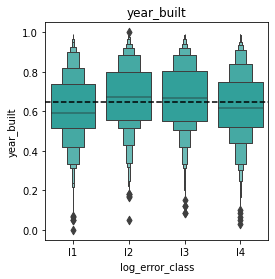

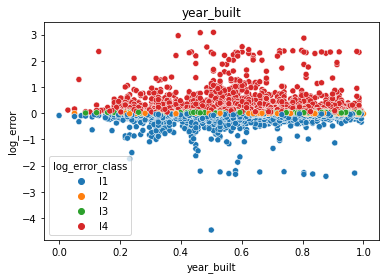

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.614314     0.672903     0.670858     0.626578
std                 0.171046     0.162166     0.164835     0.172134
min                 0.000000     0.050725     0.086957     0.028986
25%                 0.514493     0.557971     0.550725     0.521739
50%                 0.594203     0.673913     0.666667     0.615942
75%                 0.739130     0.797101     0.804348     0.746377
max                 0.992754     1.000000     0.992754     0.992754 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.028141350305491017, pvalue=2.347176711396063e-07)

____________________

struct_tax_value 
____________________



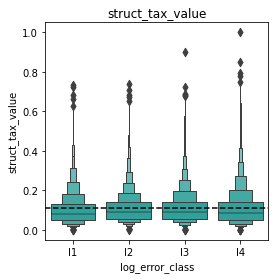

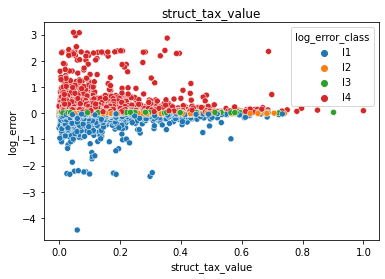

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.103124     0.109767     0.112286     0.110346
std                 0.081258     0.078212     0.082680     0.093512
min                 0.000000     0.000509     0.000588     0.000013
25%                 0.049892     0.057184     0.056460     0.048772
50%                 0.082059     0.090202     0.091409     0.084189
75%                 0.129200     0.139899     0.143405     0.140689
max                 0.733662     0.740325     0.901797     1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.013459986591095074, pvalue=0.013428752320237462)

____________________

tax_value 
____________________



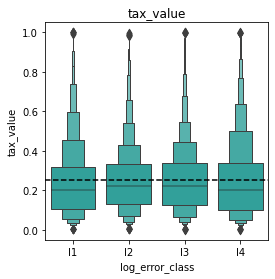

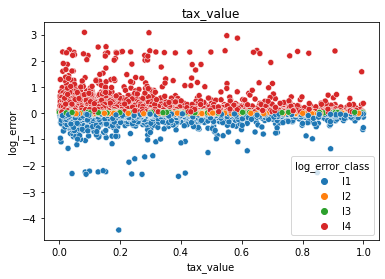

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.243862     0.251912     0.253640     0.252939
std                 0.189271     0.169110     0.174186     0.202984
min                 0.002665     0.002609     0.000769     0.000000
25%                 0.106918     0.131842     0.128318     0.102111
50%                 0.200373     0.225169     0.223959     0.202401
75%                 0.319715     0.331509     0.337608     0.341107
max                 0.999737     0.994862     1.000000     0.999603 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.002611502242537909, pvalue=0.63148844392881)

____________________

land_tax_value 
____________________



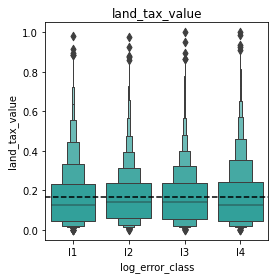

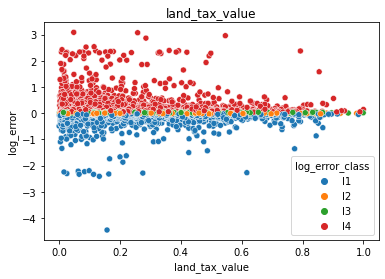

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.166047     0.168149     0.167518     0.168683
std                 0.152525     0.134520     0.136470     0.157595
min                 0.000000     0.002428     0.001767     0.002105
25%                 0.046789     0.062727     0.057936     0.044196
50%                 0.127312     0.143958     0.142180     0.125263
75%                 0.233143     0.237265     0.238530     0.242142
max                 0.983398     0.977682     0.999264     1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.0063132157373123115, pvalue=0.2462502263982934)

____________________

tax_amount 
____________________



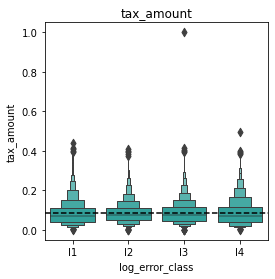

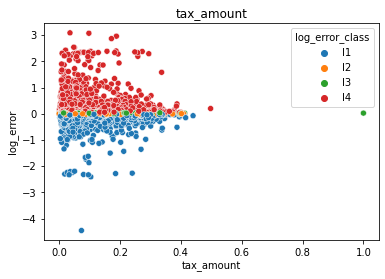

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.085261     0.088024     0.088704     0.087894
std                 0.061910     0.055837     0.058413     0.066471
min                 0.002575     0.000000     0.000180     0.001331
25%                 0.041938     0.049190     0.047646     0.038978
50%                 0.070578     0.077994     0.078182     0.071271
75%                 0.109046     0.112802     0.115795     0.115952
max                 0.440199     0.408968     1.000000     0.497803 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.00030257322033183664, pvalue=0.9556835559603484)

____________________

structure_dollar_per_sqft 
____________________



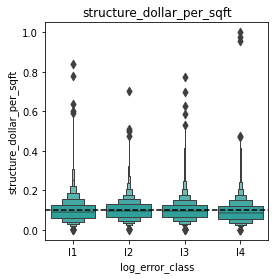

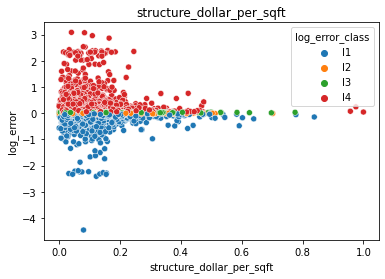

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.099442     0.102211     0.101622     0.095111
std                 0.058406     0.051232     0.053505     0.056272
min                 0.000209     0.001065     0.000188     0.000000
25%                 0.060844     0.067772     0.066449     0.056810
50%                 0.092033     0.096524     0.096156     0.087830
75%                 0.126830     0.129686     0.128890     0.122777
max                 0.838503     0.702014     0.775410     1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.03074446727493601, pvalue=1.6241385895681497e-08)

____________________

bath_bed_ratio 
____________________



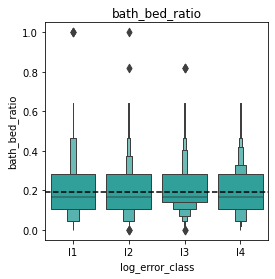

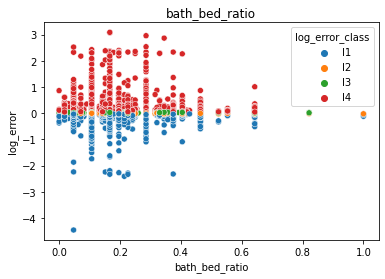

log_error_class           l1           l2           l3           l4
count            8450.000000  8534.000000  8454.000000  8296.000000
mean                0.190235     0.194380     0.196180     0.194291
std                 0.098514     0.093048     0.092123     0.097209
min                 0.000000     0.000000     0.000000     0.000000
25%                 0.107143     0.107143     0.142857     0.107143
50%                 0.166667     0.166667     0.166667     0.166667
75%                 0.285714     0.285714     0.285714     0.285714
max                 1.000000     1.000000     0.821429     0.642857 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.017663172782047487, pvalue=0.0011774147240621428)

____________________



In [10]:
ex.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

In [11]:
sns.scatterplot(data=train[train.la_cnty == 1] y=continuous_target, x='bathrooms', hue='age_bin')
plt.title('LA')
plt.show()
sns.scatterplot(data=train[train.orange_cnty == 1], y=continuous_target, x='bathrooms', hue='pool_cnt')
plt.title("Orange County")
plt.show()
sns.scatterplot(data=train[train.ventura_cnty == 1], y=continuous_target, x='bathrooms', hue='pool_cnt')
plt.title('Ventura County')
plt.show()

SyntaxError: invalid syntax (<ipython-input-11-c6a5fac137fa>, line 1)

# Kmeans

In [ ]:
from sklearn.cluster import KMeans

## pool_cnt and log_error in The City of Los Angeles

In [ ]:
X = train[train.cola == 1]

In [ ]:
X_scaled = X[['pool_cnt','log_error']]

In [ ]:
# define the model
kmeans = KMeans(n_clusters=3)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

In [ ]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X.head()

In [ ]:
kmeans.cluster_centers_

In [ ]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['pool_cnt','log_error'])
centroids_scaled

In [ ]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'pool_cnt', y = 'log_error', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'pool_cnt', y = 'log_error', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

## fireplace count vs log error in properties with a central heating system 

In [ ]:
X = train[train.heating_system_type_id == 2] 

In [ ]:
X_scaled = X[['fireplace_cnt','log_error']]

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# define the model
kmeans = KMeans(n_clusters=4)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

In [ ]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X.head()

In [ ]:
kmeans.cluster_centers_

In [ ]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['fireplace_cnt','log_error'])
centroids_scaled


In [ ]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'fireplace_cnt', y = 'log_error', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'fireplace_cnt', y = 'log_error', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

## Lot size and log error in Ventura county

In [ ]:
X = train[train.fips == 6111] 

In [ ]:
X_scaled = X[['lot_sqft','log_error']]

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# define the model
kmeans = KMeans(n_clusters=5)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

In [ ]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

In [ ]:
kmeans.cluster_centers_

In [ ]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['lot_sqft','log_error'])
centroids_scaled


In [ ]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'lot_sqft', y = 'log_error', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'lot_sqft', y = 'log_error', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

## Lot size and log error in Orange county

In [ ]:
X = train[train.fips == 6059] 

In [ ]:
X_scaled = X[['lot_sqft','log_error']]

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# define the model
kmeans = KMeans(n_clusters=5)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

In [ ]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

In [ ]:
kmeans.cluster_centers_

In [ ]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['lot_sqft','log_error'])
centroids_scaled


In [ ]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'lot_sqft', y = 'log_error', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'lot_sqft', y = 'log_error', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

## Lot size and log error in LA county

In [ ]:
X = train[train.fips == 6037] 

In [ ]:
X_scaled = X[['lot_sqft','log_error']]

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# define the model
kmeans = KMeans(n_clusters=5)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

In [ ]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

In [ ]:
kmeans.cluster_centers_

In [ ]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['lot_sqft','log_error'])
centroids_scaled


In [ ]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'lot_sqft', y = 'log_error', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'lot_sqft', y = 'log_error', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

## Lot size and log error in LA City

In [ ]:
X = train[train.cola == 1] 

In [ ]:
X_scaled = X[['lot_sqft','log_error']]

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# define the model
kmeans = KMeans(n_clusters=5)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

In [ ]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

In [ ]:
kmeans.cluster_centers_

In [ ]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['lot_sqft','log_error'])
centroids_scaled


In [ ]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'lot_sqft', y = 'log_error', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'lot_sqft', y = 'log_error', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

# Start HERE

In [4]:
from sklearn.cluster import KMeans

In [5]:
X_scaled = train[['tax_value','prop_sqft']] 

NameError: name 'train' is not defined

In [6]:
# define the model
kmeans = KMeans(n_clusters=4)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

NameError: name 'X_scaled' is not defined

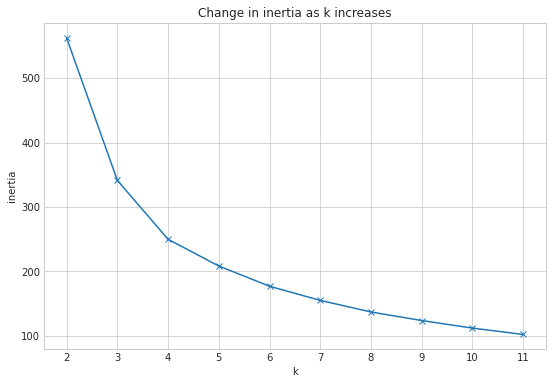

In [32]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [33]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

tax_value  prop_sqft  cluster
parcelid                               
14610791   0.228345   0.095506        3
11583704   0.416406   0.116139        0
14298103   0.495834   0.238917        0
11580695   0.157128   0.316650        3
12867887   0.098856   0.156078        1

In [34]:
kmeans.cluster_centers_

array([[0.43360457, 0.21943332],
       [0.09137122, 0.13086249],
       [0.74395569, 0.29096389],
       [0.24749223, 0.14927432]])

In [35]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['tax_value','prop_sqft'])
centroids_scaled


tax_value  prop_sqft
0   0.433605   0.219433
1   0.091371   0.130862
2   0.743956   0.290964
3   0.247492   0.149274

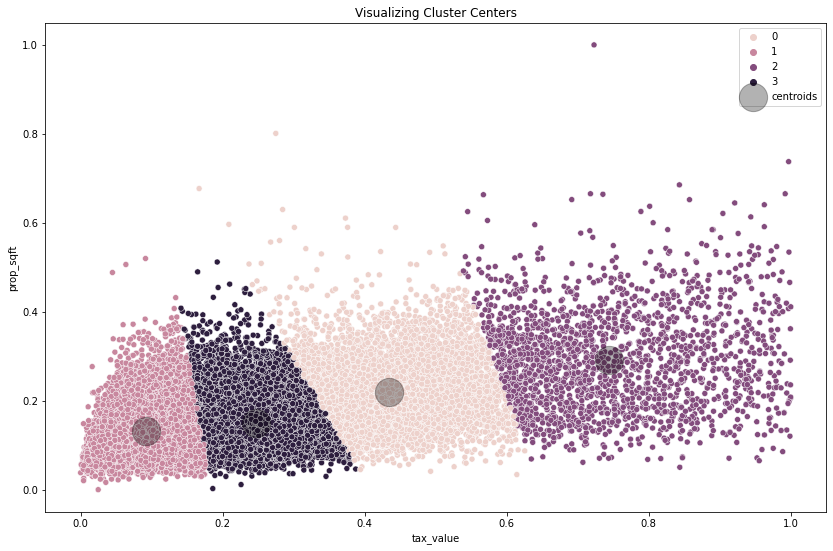

In [36]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'tax_value', y = 'prop_sqft', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'tax_value', y = 'prop_sqft', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [37]:
X_scaled.head()

tax_value  prop_sqft  cluster
parcelid                               
14610791   0.228345   0.095506        3
11583704   0.416406   0.116139        0
14298103   0.495834   0.238917        0
11580695   0.157128   0.316650        3
12867887   0.098856   0.156078        1

# Project Description and Goals

Zillow is one of the most popular real estate databases online. One of Zillow’s key features is its Zestimates, a popular consumer tool for seeing how much homes are worth.




Zestimates offer users a starting point in home valuation, but these numbers may not be as accurate as one might think for a variety of reasons and there may still be some error.




That is why Zillow's dataset includes the log error information, which is the difference between sales price and estimated price.



### What is driving the errors in Zestimates?

For this project we are working with the Zillow dataset using the 2017 properties and predictions data for single unit / single family homes.

This notebook consists of discoveries made and work that was done related to uncovering what the drivers of the error in the zestimate is.

### Objectives for this project include:
- Identifying the drivers for errors in Zestimates by incorporating clustering methodologies.
- Documenting process and analysis throughout the data science pipeline.
- Demonstrating the information that was discovered.
- Deliverables:
    - README.md file containing overall project information, how to reproduce work, and notes from project planning.
    - Jupyter Notebook Report detailing the pipeline process.
    - Python modules that automate the data acquistion, preparation, and exploration process. 

### Pipeline Process:
1. Acquire
2. Prepare
3. Explore
4. Model/Evaluate
5. Deliver

### Initial hypotheses
- Is log error  significantly different for properties in LA County vs Orange County vs Ventura County?
- Is there a correlation between square footage of a home and log error?
- Is there a relationship between tax value and log error?
- Could there be clusters in square footage and county location that can help predict log error? 

### Project Imports

In [8]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# acquire, prepare, and explore
import wrangle as w
import explore as ex

# statistical testing
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Regression Modeling
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Data Acquisition

In [9]:
df = w.get_zillow_data(cached=True)
df.head()

typeconstructiontypeid  storytypeid  heatingorsystemtypeid  \
0                     NaN          NaN                    2.0   
1                     NaN          NaN                    2.0   
2                     NaN          NaN                    2.0   
3                     NaN          NaN                    2.0   
4                     NaN          NaN                    2.0   

   buildingclasstypeid  architecturalstyletypeid  airconditioningtypeid  \
0                  NaN                       NaN                    NaN   
1                  NaN                       NaN                    1.0   
2                  NaN                       NaN                    1.0   
3                  NaN                       NaN                    NaN   
4                  NaN                       NaN                    NaN   

   parcelid       id  basementsqft  bathroomcnt  ...  taxdelinquencyyear  \
0  10711855  1087254           NaN          2.0  ...                 NaN   
1  10711877  1072280           NaN          2.0  ...                 NaN   
2  10711888  1340933           NaN          2.0  ...                 NaN   
3  10711910  1878109           NaN          2.0  ...                 NaN   
4  10711923  2190858           NaN          2.0  ...                 NaN   

   censustractandblock  logerror  transactiondate  airconditioningdesc  \
0         6.037113e+13 -0.007357       2017-07-07                  NaN   
1         6.037113e+13  0.021066       2017-08-29              Central   
2         6.037113e+13  0.077174       2017-04-04              Central   
3         6.037113e+13 -0.041238       2017-03-17                  NaN   
4         6.037113e+13 -0.009496       2017-03-24                  NaN   

   architecturalstyledesc  buildingclassdesc  heatingorsystemdesc  storydesc  \
0                     NaN                NaN              Central        NaN   
1                     NaN                NaN              Central        NaN   
2                     NaN                NaN              Central        NaN   
3                     NaN                NaN              Central        NaN   
4                     NaN                NaN              Central        NaN   

   typeconstructiondesc  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 67 columns]

In [10]:
#rows and columns
df.shape

(77413, 67)

In [11]:
#list of column names and data types with more information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77413 entries, 0 to 77412
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        222 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   heatingorsystemtypeid         49439 non-null  float64
 3   buildingclasstypeid           15 non-null     float64
 4   architecturalstyletypeid      206 non-null    float64
 5   airconditioningtypeid         24953 non-null  float64
 6   parcelid                      77413 non-null  int64  
 7   id                            77413 non-null  int64  
 8   basementsqft                  50 non-null     float64
 9   bathroomcnt                   77380 non-null  float64
 10  bedroomcnt                    77380 non-null  float64
 11  buildingqualitytypeid         49671 non-null  float64
 12  calculatedbathnbr             76771 non-null  float64
 13  d

In [12]:
#check nulls
df.isnull().sum()

typeconstructiontypeid          77191
storytypeid                     77363
heatingorsystemtypeid           27974
buildingclasstypeid             77398
architecturalstyletypeid        77207
airconditioningtypeid           52460
parcelid                            0
id                                  0
basementsqft                    77363
bathroomcnt                        33
bedroomcnt                         33
buildingqualitytypeid           27742
calculatedbathnbr                 642
decktypeid                      76799
finishedfloor1squarefeet        71390
calculatedfinishedsquarefeet      229
finishedsquarefeet12             3665
finishedsquarefeet13            77372
finishedsquarefeet15            74404
finishedsquarefeet50            71390
finishedsquarefeet6             77027
fips                               33
fireplacecnt                    69137
fullbathcnt                       642
garagecarcnt                    51939
garagetotalsqft                 51939
hashottubors

In [13]:
df.describe().T

count          mean           std  \
typeconstructiontypeid          222.0  6.040541e+00  5.572847e-01   
storytypeid                      50.0  7.000000e+00  0.000000e+00   
heatingorsystemtypeid         49439.0  3.920447e+00  3.592789e+00   
buildingclasstypeid              15.0  3.933333e+00  2.581989e-01   
architecturalstyletypeid        206.0  7.388350e+00  2.734542e+00   
airconditioningtypeid         24953.0  1.813289e+00  2.967894e+00   
parcelid                      77413.0  1.300670e+07  3.480712e+06   
id                            77413.0  1.495761e+06  8.612707e+05   
basementsqft                     50.0  6.797200e+02  6.897035e+02   
bathroomcnt                   77380.0  2.299134e+00  9.966566e-01   
bedroomcnt                    77380.0  3.053489e+00  1.139103e+00   
buildingqualitytypeid         49671.0  6.534638e+00  1.721933e+00   
calculatedbathnbr             76771.0  2.316871e+00  9.797606e-01   
decktypeid                      614.0  6.600000e+01  0.000000e+00   
finishedfloor1squarefeet       6023.0  1.366513e+03  6.713081e+02   
calculatedfinishedsquarefeet  77184.0  1.785229e+03  9.540518e+02   
finishedsquarefeet12          73748.0  1.760532e+03  9.340270e+02   
finishedsquarefeet13             41.0  1.389854e+03  1.235317e+02   
finishedsquarefeet15           3009.0  2.357792e+03  1.188775e+03   
finishedsquarefeet50           6023.0  1.381772e+03  7.264689e+02   
finishedsquarefeet6             386.0  2.082500e+03  1.240383e+03   
fips                          77380.0  6.048819e+03  2.074829e+01   
fireplacecnt                   8276.0  1.191155e+00  4.910796e-01   
fullbathcnt                   76771.0  2.250485e+00  9.665580e-01   
garagecarcnt                  25474.0  1.815459e+00  5.883449e-01   
garagetotalsqft               25474.0  3.501120e+02  2.616816e+02   
hashottuborspa                 1538.0  1.000000e+00  0.000000e+00   
latitude                      77380.0  3.400837e+07  2.653905e+05   
longitude                     77380.0 -1.182036e+08  3.594833e+05   
lotsizesquarefeet             69141.0  2.996963e+04  1.233719e+05   
poolcnt                       16137.0  1.000000e+00  0.000000e+00   
poolsizesum                     867.0  5.179170e+02  1.567160e+02   
pooltypeid10                    464.0  1.000000e+00  0.000000e+00   
pooltypeid2                    1074.0  1.000000e+00  0.000000e+00   
pooltypeid7                   15042.0  1.000000e+00  0.000000e+00   
propertylandusetypeid         77380.0  2.618264e+02  5.141231e+00   
rawcensustractandblock        77380.0  6.049130e+07  2.059061e+05   
regionidcity                  75909.0  3.367013e+04  4.716913e+04   
regionidcounty                77380.0  2.534151e+03  8.015959e+02   
regionidneighborhood          30890.0  1.877349e+05  1.651188e+05   
regionidzip                   77330.0  9.658709e+04  3.798372e+03   
roomcnt                       77380.0  1.476971e+00  2.824399e+00   
threequarterbathnbr           10096.0  1.009608e+00  1.186301e-01   
unitcnt                       50562.0  1.110023e+00  1.171166e+00   
yardbuildingsqft17             2388.0  3.054112e+02  2.383928e+02   
yardbuildingsqft26               70.0  2.163857e+02  1.901775e+02   
yearbuilt                     77117.0  1.968636e+03  2.378617e+01   
numberofstories               17560.0  1.434738e+00  5.445687e-01   
fireplaceflag                   172.0  1.000000e+00  0.000000e+00   
structuretaxvaluedollarcnt    77268.0  1.893160e+05  2.300886e+05   
taxvaluedollarcnt             77379.0  4.901375e+05  6.534477e+05   
assessmentyear                77380.0  2.016000e+03  0.000000e+00   
landtaxvaluedollarcnt         77378.0  3.010969e+05  4.925990e+05   
taxamount                     77375.0  5.995567e+03  7.622887e+03   
taxdelinquencyyear             2886.0  1.408732e+01  2.185663e+00   
censustractandblock           77136.0  6.049674e+13  1.535252e+12   
logerror                      77413.0  1.699951e-02  1.698796e-01   

                             

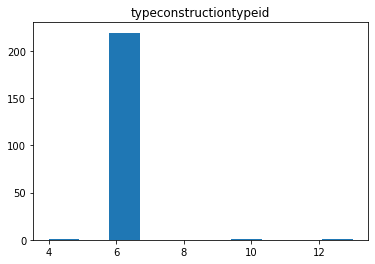

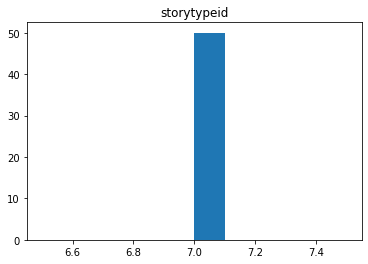

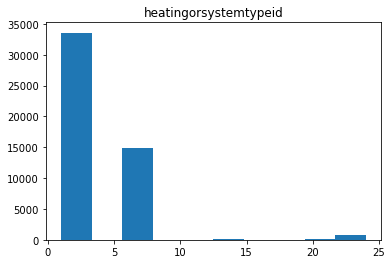

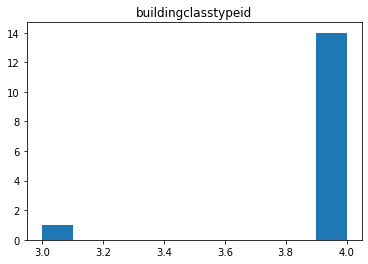

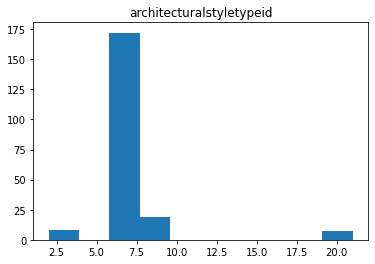

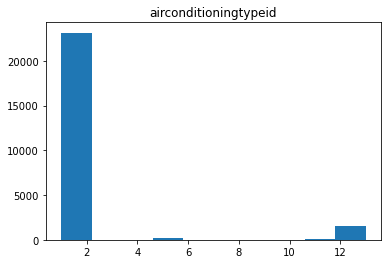

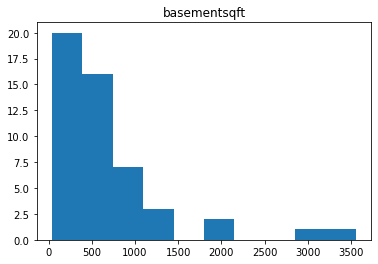

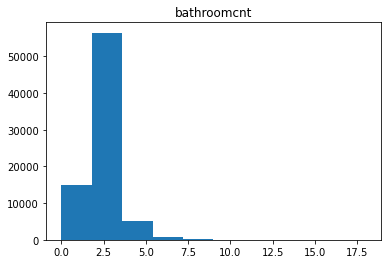

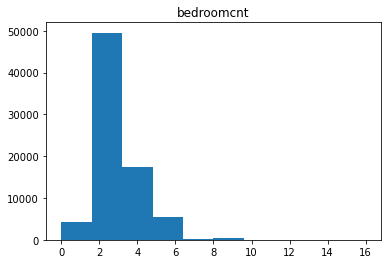

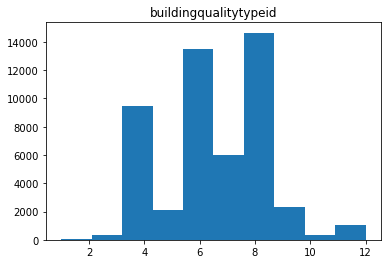

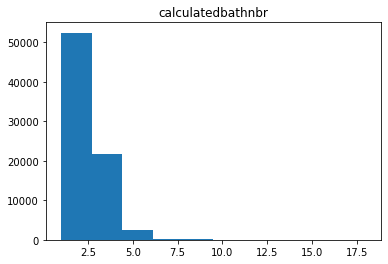

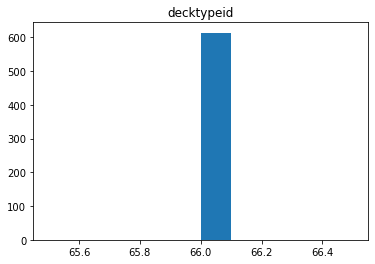

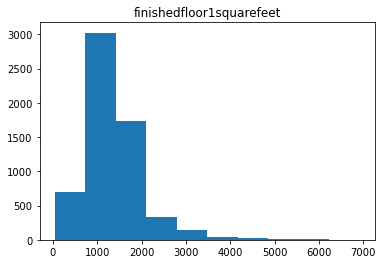

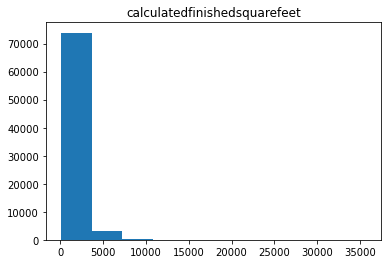

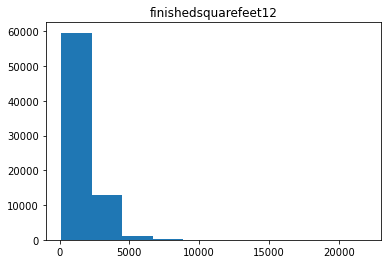

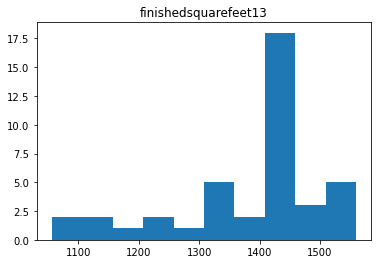

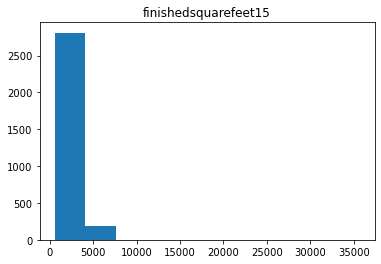

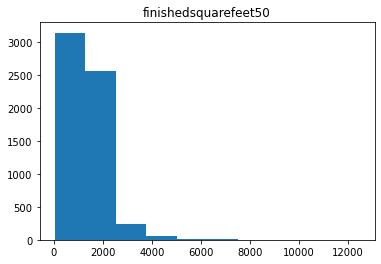

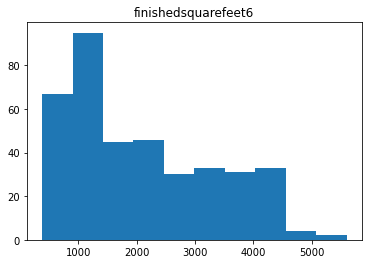

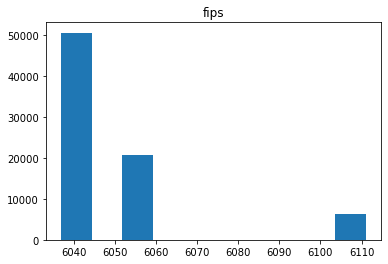

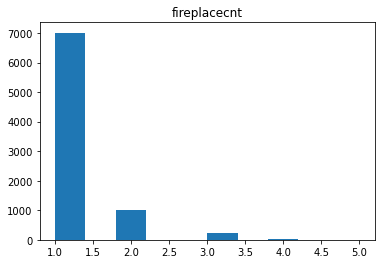

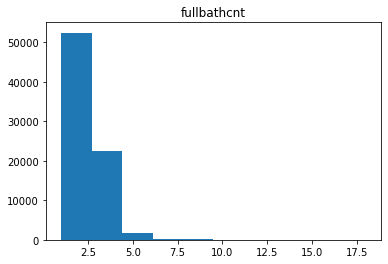

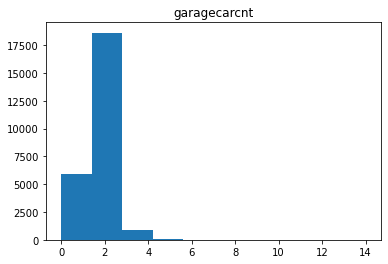

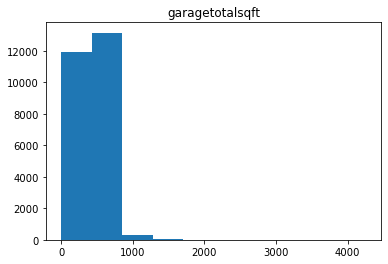

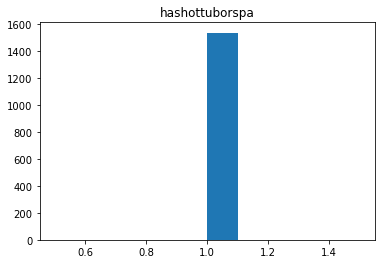

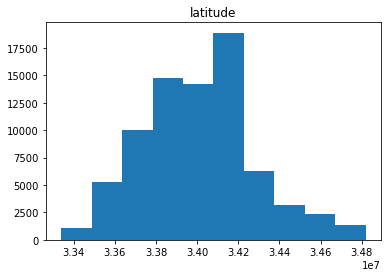

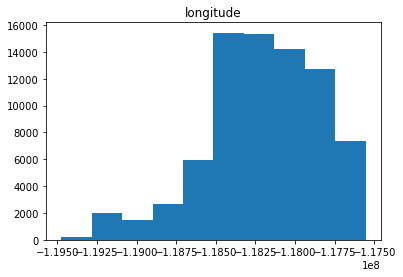

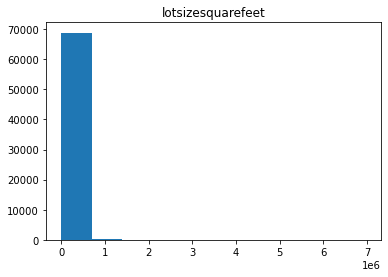

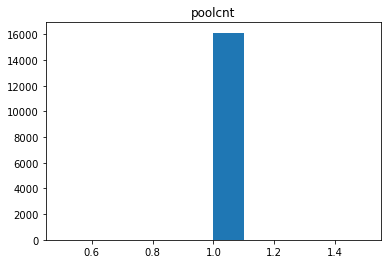

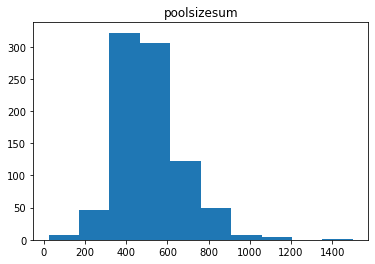

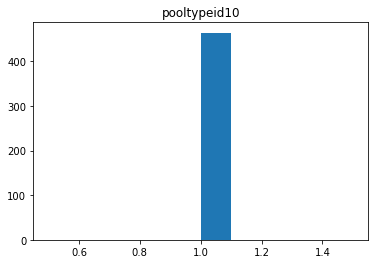

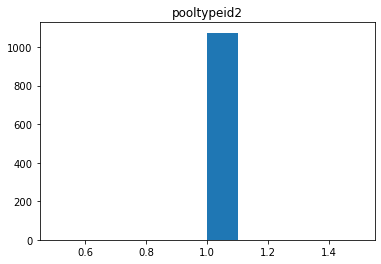

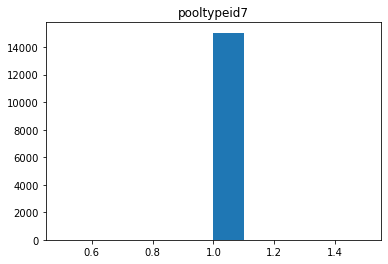

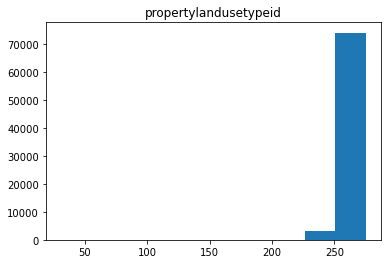

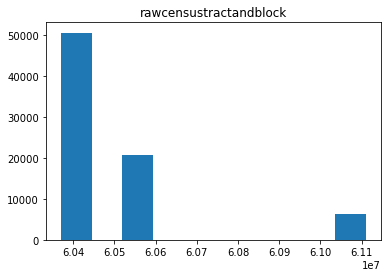

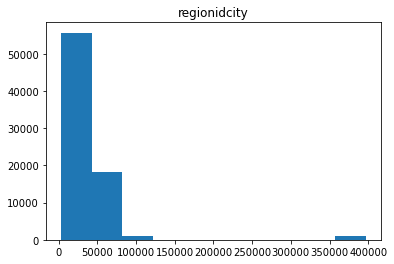

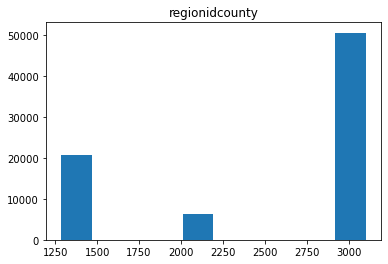

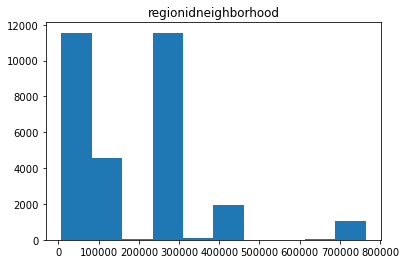

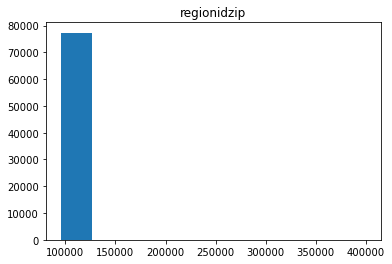

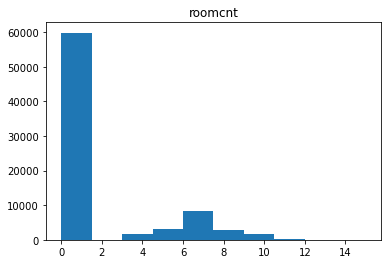

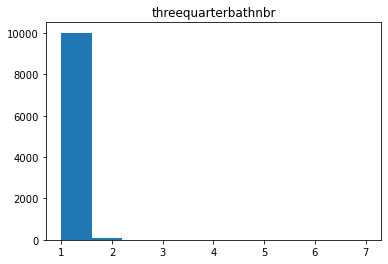

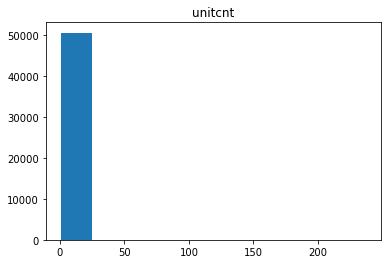

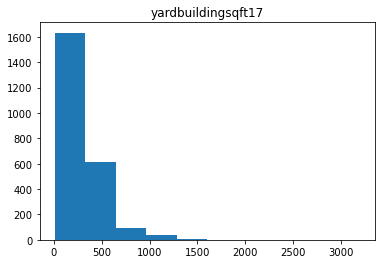

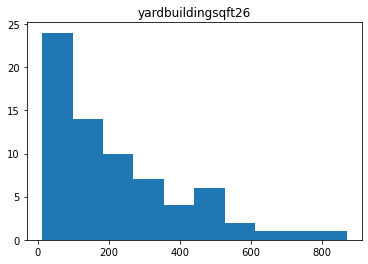

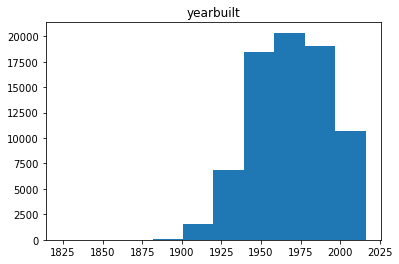

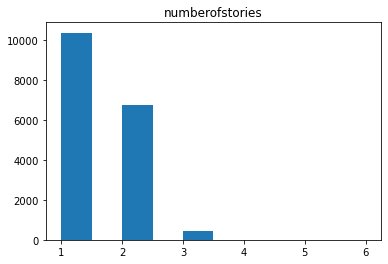

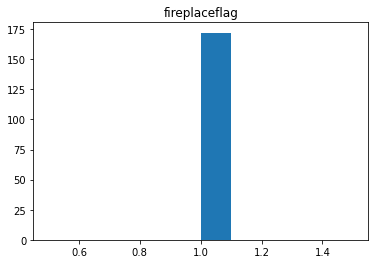

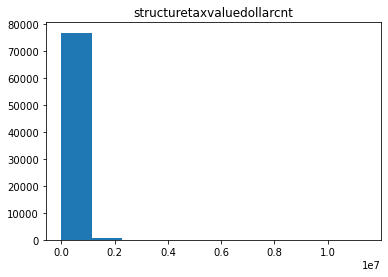

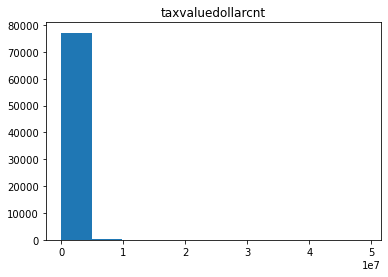

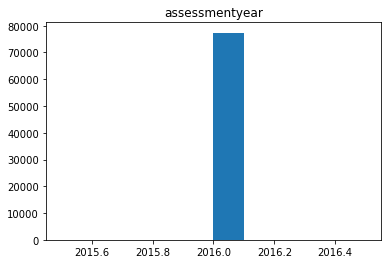

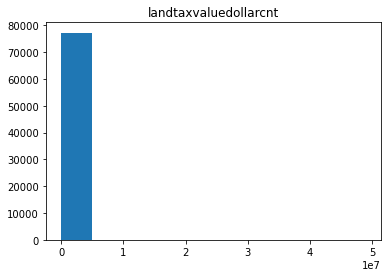

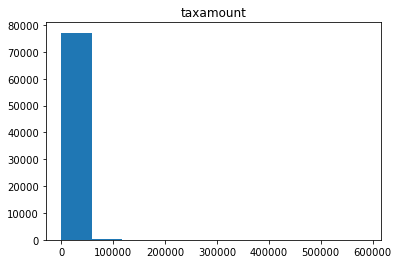

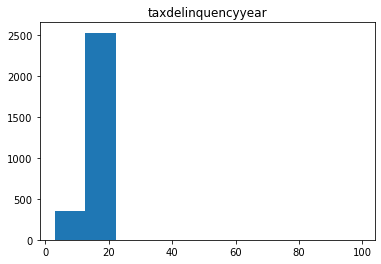

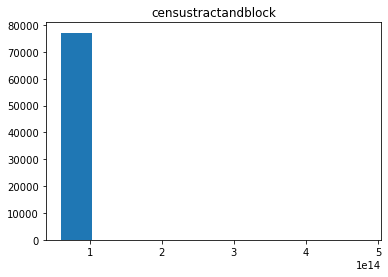

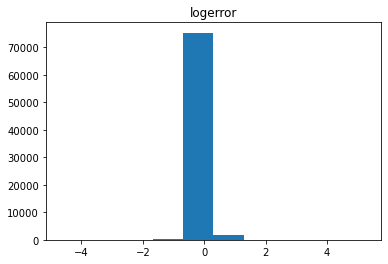

In [14]:
#distributions
for col in df.columns:
    if df[col].dtype != object and col != 'parcelid' and col != 'id':
        plt.hist(df[col])
        plt.title(col)
        plt.show()

### Findings
- many nulls in columns and rows that need to be removed and/or filled in 
- outliers are present and need to be removed
- redundant/unnecessary columns can be dropped
- columns can be renamed for better readability
- change datatypes to integers
- create dummy vars for fips
- index can be set to parcelid
- new features can be created for age, tax rate, acres, etc.

# Data Preparation

In [15]:
df = w.wrangle_zillow(cached=True)
df.head()

heating_system_type_id  bathrooms  bedrooms  prop_sqft  fips  \
parcelid                                                                 
10711855                       2        2.0       3.0     2107.0  6037   
10711877                       2        2.0       4.0     1882.0  6037   
10711888                       2        2.0       4.0     1882.0  6037   
10711910                       2        2.0       3.0     1477.0  6037   
10711923                       2        2.0       4.0     1918.0  6037   

          fireplace_cnt  latitude  longitude  lot_sqft  pool_cnt  ...  \
parcelid                                                          ...   
10711855            0.0  0.342226  -1.186174      9158       1.0  ...   
10711877            0.0  0.342203  -1.186164      9035       1.0  ...   
10711888            0.0  0.342225  -1.186169      9800       0.0  ...   
10711910            0.0  0.342219  -1.186157     11285       1.0  ...   
10711923            0.0  0.342206  -1.186153     11239       1.0  ...   

           taxrate     acres  acres_bin  sqft_bin  structure_dollar_per_sqft  \
parcelid                                                                       
10711855  1.227188  0.210239        0.2       0.5                 118.488372   
10711877  1.230895  0.207415        0.2       0.4                 134.431456   
10711888  1.229132  0.224977        0.2       0.4                 136.870882   
10711910  1.430790  0.259068        0.3       0.3                  39.247123   
10711923  1.261220  0.258012        0.3       0.4                  87.522941   

          structure_dollar_sqft_bin  land_dollar_per_sqft  \
parcelid                                                    
10711855                        0.4             40.891461   
10711877                        0.4             45.047039   
10711888                        0.4             29.115510   
10711910                        0.1              1.777847   
10711923                        0.3             22.029540   

          lot_dollar_sqft_bin bath_bed_ratio  cola  
parcelid                                            
10711855                  0.3       0.666667     1  
10711877                  0.3       0.500000     1  
10711888                  0.3       0.500000     1  
10711910                  0.1       0.666667     1  
10711923                  0.3       0.500000     1  

[5 rows x 35 columns]

In [16]:
df.dtypes

heating_system_type_id          int64
bathrooms                     float64
bedrooms                      float64
prop_sqft                     float64
fips                            int64
fireplace_cnt                 float64
latitude                      float64
longitude                     float64
lot_sqft                        int64
pool_cnt                      float64
region_id_city                  int64
year_built                    float64
fireplace_flag                  int64
struct_tax_value              float64
tax_value                     float64
land_tax_value                float64
tax_amount                    float64
log_error                     float64
heating_system_desc            object
la_cnty                         uint8
orange_cnty                     uint8
ventura_cnty                    uint8
log_error_class              category
age                           float64
age_bin                       float64
taxrate                       float64
acres       

In [17]:
df.isnull().sum()

heating_system_type_id       0
bathrooms                    0
bedrooms                     0
prop_sqft                    0
fips                         0
fireplace_cnt                0
latitude                     0
longitude                    0
lot_sqft                     0
pool_cnt                     0
region_id_city               0
year_built                   0
fireplace_flag               0
struct_tax_value             0
tax_value                    0
land_tax_value               0
tax_amount                   0
log_error                    0
heating_system_desc          0
la_cnty                      0
orange_cnty                  0
ventura_cnty                 0
log_error_class              0
age                          0
age_bin                      0
taxrate                      0
acres                        0
acres_bin                    0
sqft_bin                     0
structure_dollar_per_sqft    0
structure_dollar_sqft_bin    0
land_dollar_per_sqft         0
lot_doll

In [18]:
#split
train_validate, test = train_test_split(df, train_size=.80, random_state=123)
train, validate = train_test_split(train_validate, random_state=123)

train.shape, validate.shape, test.shape

((36144, 35), (12048, 35), (12048, 35))

In [19]:
train.head()

heating_system_type_id  bathrooms  bedrooms  prop_sqft  fips  \
parcelid                                                                 
11053337                       2        2.0       3.0     1641.0  6037   
11184707                       2        2.0       3.0     1854.0  6037   
12111920                       2        1.0       1.0      807.0  6037   
12730510                       7        1.0       3.0     1045.0  6037   
11123078                       2        3.0       4.0     2040.0  6037   

          fireplace_cnt  latitude  longitude  lot_sqft  pool_cnt  ...  \
parcelid                                                          ...   
11053337            0.0  0.342330  -1.184758      8619       0.0  ...   
11184707            0.0  0.346181  -1.181858      7212       0.0  ...   
12111920            0.0  0.341421  -1.181280     21646       1.0  ...   
12730510            0.0  0.339189  -1.180198      6095       1.0  ...   
11123078            0.0  0.344540  -1.184890     10419       1.0  ...   

           taxrate     acres  acres_bin  sqft_bin  structure_dollar_per_sqft  \
parcelid                                                                       
11053337  1.241154  0.197865        0.2       0.4                 111.361974   
11184707  2.338565  0.165565        0.2       0.4                  21.457389   
12111920  1.221949  0.496924        0.3       0.1                 103.100372   
12730510  1.305227  0.139922        0.1       0.2                 123.977990   
11123078  1.406188  0.239187        0.2       0.5                 149.644608   

          structure_dollar_sqft_bin  land_dollar_per_sqft  \
parcelid                                                    
11053337                        0.4             35.337626   
11184707                        0.0              6.428730   
12111920                        0.4              2.060103   
12730510                        0.4             36.748154   
11123078                        0.4             25.363950   

          lot_dollar_sqft_bin bath_bed_ratio  cola  
parcelid                                            
11053337                  0.3       0.666667     1  
11184707                  0.2       0.666667     0  
12111920                  0.1       1.000000     0  
12730510                  0.3       0.333333     0  
11123078                  0.3       0.750000     0  

[5 rows x 35 columns]

In [20]:
#choosing features to explore on
X = train[['bathrooms', 'bedrooms', 'prop_sqft', 'fips', 'tax_value', 'log_error', 'la_cnty', 'orange_cnty', 'ventura_cnty']]
X.head()

bathrooms  bedrooms  prop_sqft  fips  tax_value  log_error  la_cnty  \
parcelid                                                                        
11053337        2.0       3.0     1641.0  6037   487320.0   0.023839        1   
11184707        2.0       3.0     1854.0  6037    86146.0   0.030284        1   
12111920        1.0       1.0      807.0  6037   127795.0  -0.053367        1   
12730510        1.0       3.0     1045.0  6037   353537.0   0.002566        1   
11123078        3.0       4.0     2040.0  6037   569542.0  -0.021626        1   

          orange_cnty  ventura_cnty  
parcelid                             
11053337            0             0  
11184707            0             0  
12111920            0             0  
12730510            0             0  
11123078            0             0

Data is:
- cleaned/prepped 
- split into train, validate, test for exploration.
- ready to be explored on training (in-sample) data.

# Data exploration

#### Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?


In [21]:
#create a df to show the name of the county for each fips code
county = pd.DataFrame({'fips': [6037, 6059, 6111],
                       'County': ['Los Angeles', 'Orange', 'Ventura']})
county.head()

fips       County
0  6037  Los Angeles
1  6059       Orange
2  6111      Ventura

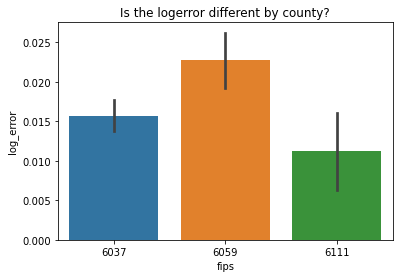

In [22]:
sns.barplot(data = train, x = 'fips', y = 'log_error')
plt.title("Is the logerror different by county?")
plt.show()

In [23]:
#T-test: logerror and counties
null_hypothesis = "there is no difference in logerror between counties."
alternative_hypothesis = "there is a difference in logerror between counties."
confidence_level = .95
alpha = 1 - confidence_level

la_county = train[train.fips  == 6037].log_error
other_counties = train[train.fips != 6037].log_error

t, p = stats.ttest_ind(la_county, other_counties)

print("t:", t, "p:", p)
if p < alpha:
    print("We reject the null hypothesis.")
    print("We can move forward with the alternative hypothesis:", alternative_hypothesis)

else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support", alternative_hypothesis)

t: -2.52714385008108 p: 0.011503667395718897
We reject the null hypothesis.
We can move forward with the alternative hypothesis: there is a difference in logerror between counties.


### Takeaways
- logerror is highest in Orange county
- logerror is roughly the same in Los Angeles and Ventura (slightly less in Ventura).
- T-test resulted in rejecting the null hypothesis meaning we can assume that there is a difference in logerror between counties
- Results show logerror is significantly different for properties in LA County vs Orange County vs Ventura County

#### Is there a correlation between square footage of a home and log error?

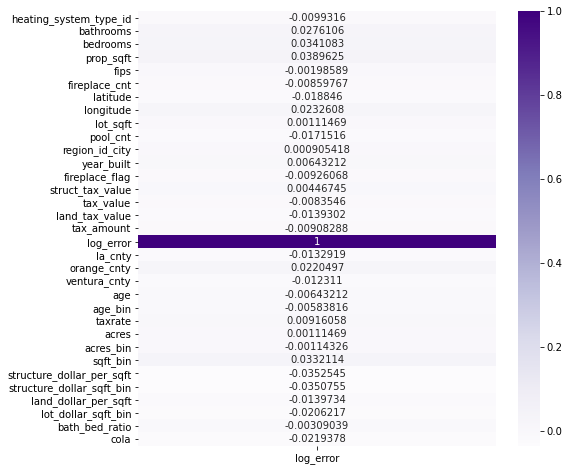

In [24]:
plt.figure(figsize = (8,8))

corrMatrix = train.corr()

htmp = pd.DataFrame(corrMatrix['log_error'],
              index=corrMatrix.index)

sns.heatmap(htmp, annot=True, fmt="g", cmap='Purples')

plt.show()

### Takeaways
- logerror doesn't have much correlation with anything
- however, logerror shows more correlation with prop_sqft than the rest of the features

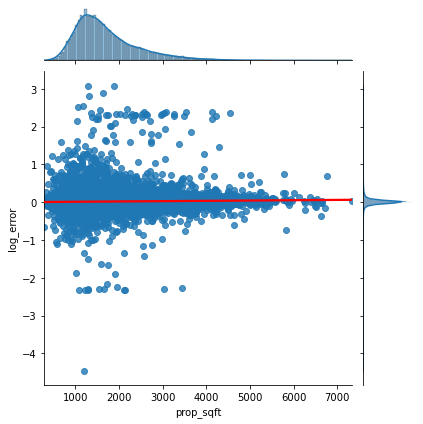

In [25]:
g = sns.jointplot(x="prop_sqft", y="log_error", data=train, kind='reg')
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)

### Takeaways
- slight upward trend in log error as square feet increases
- homes between 1,000-4,000 sq ft have quite a bit of variance in log error

In [26]:
#Correlation Test: logerror and square feet
null_hypothesis = "there is no correlation between logerror and square footage of a home."
alternative_hypothesis = "there is a correlation between logerror and square footage of a home."
confidence_level = .95
alpha = 1 - confidence_level

#Use pearsonr function
corr, p = stats.pearsonr(train.log_error, train.prop_sqft)

print("corr:", corr, "p:", p)

if p < alpha:
    print("We reject the null hypothesis.")
    print("We can move forward with the alternative hypothesis:", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support", alternative_hypothesis)

corr: 0.03896249298909045 p: 1.2635559282616945e-13
We reject the null hypothesis.
We can move forward with the alternative hypothesis: there is a correlation between logerror and square footage of a home.


### Takeaways
- Pearson's correlation test resulted in rejecting the null hypothesis, so we can assume that there is a correlation between logerror and square footage of a home
- Results show a correlation between square footage of a home and logerror

#### Could square footage and county location help predict log error?

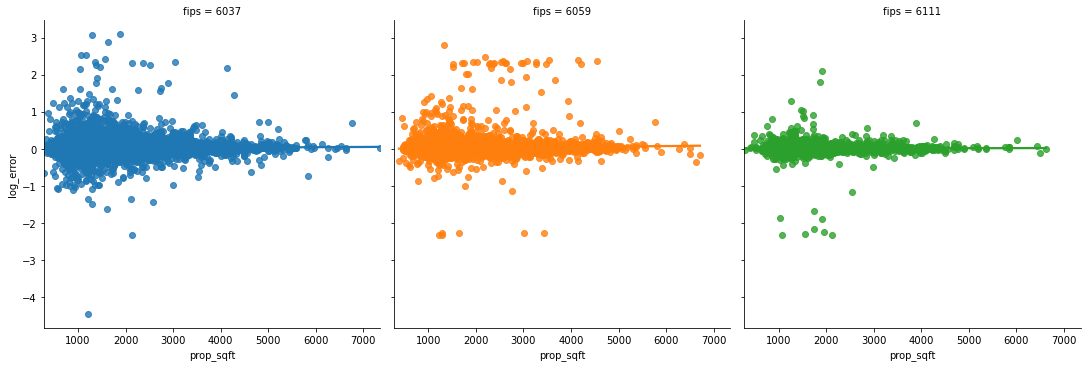

In [27]:
sns.lmplot(data=train, 
           x='prop_sqft', 
           y='log_error', 
           hue = 'fips', 
           col = 'fips', 
           col_wrap=3)

plt.show()

### Takeaways
- logerror shows the highest amount of variance for LA and Orange county.
- least amount of variance in Ventura county

#### Is there a relationship between tax value and log error?

<AxesSubplot:xlabel='tax_value', ylabel='log_error'>

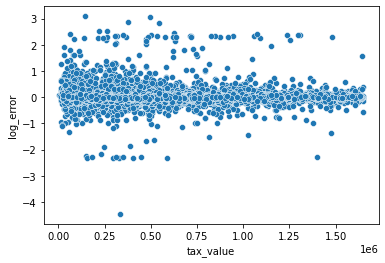

In [28]:
sns.scatterplot(x = 'tax_value', y = 'log_error', data = train)

In [29]:
continuous_target = 'log_error'

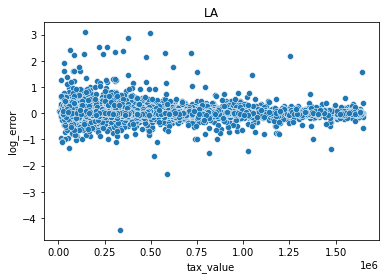

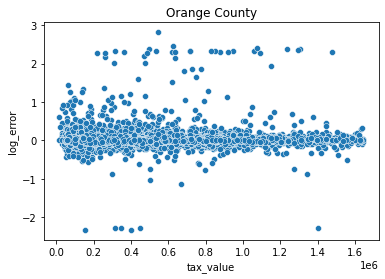

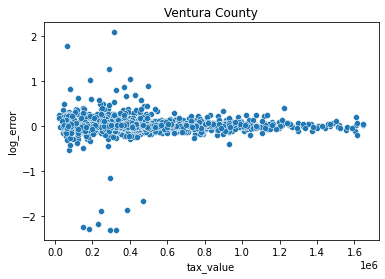

In [30]:
sns.scatterplot(data=train[train.la_cnty == 1], y=continuous_target, x='tax_value')
plt.title('LA')
plt.show()
sns.scatterplot(data=train[train.orange_cnty == 1], y=continuous_target, x='tax_value')
plt.title("Orange County")
plt.show()
sns.scatterplot(data=train[train.ventura_cnty == 1], y=continuous_target, x='tax_value')
plt.title('Ventura County')
plt.show()

In [31]:
#Correlation Test: tax value and logerror
null_hypothesis = "there is no correlation between tax value and logerror."
alternative_hypothesis = "there is a correlation between tax value and logerror."
confidence_level = .95
alpha = 1 - confidence_level

#Use pearsonr function
corr, p = stats.pearsonr(train.tax_value, train.log_error)

print("corr:", corr, "p:", p)
if p < alpha:
    print("We reject the null hypothesis.")
    print("We can move forward with the alternative hypothesis:", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support", alternative_hypothesis)

corr: -0.008354604671796391 p: 0.11221518311860741
We fail to reject the null hypothesis
Not enough evidence to support there is a correlation between tax value and logerror.


# Data Modeling and Evaluation

In [32]:
# Useful functions for clustering:
def create_cluster(train, X, k):
    '''
    takes in train, X df with variables to cluster on, and k.
    
    It scales the X, calculates the clusters, 
    
    returns train (with clusters), 
    the Scaled dataframe,
    the scaler,
    kmeans object, 
    and unscaled centroids as a dataframe
    '''
    
    #scale X
    scaler = StandardScaler(copy=True).fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    
    #calculate clusters
    kmeans = KMeans(n_clusters = k, random_state = 123)
    kmeans.fit(X_scaled)
    kmeans.predict(X_scaled)
    train['cluster'] = kmeans.predict(X_scaled)
    train['cluster'] = 'cluster_' + train.cluster.astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    
    return train, X_scaled, scaler, kmeans, centroids


def create_scatter_plot(x,y,train,kmeans, X_scaled, scaler):
    '''
    takes in x and y variable names as strings, 
    along with returned objects from previous create_cluster function,
    and creates a plot
    '''
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = x, y = y, data = train, hue = 'cluster')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')

### Clustering for tax_value and prop sq ft

In [33]:
#start w/ 2 features
X = train[['tax_value', 'prop_sqft']]
X.head()

tax_value  prop_sqft
parcelid                      
11053337   487320.0     1641.0
11184707    86146.0     1854.0
12111920   127795.0      807.0
12730510   353537.0     1045.0
11123078   569542.0     2040.0

In [34]:
#scale data
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

tax_value  prop_sqft
11053337   0.220078  -0.109734
11184707  -1.110349   0.173101
12111920  -0.972227  -1.217169
12730510  -0.223591  -0.901138
11123078   0.492753   0.420083

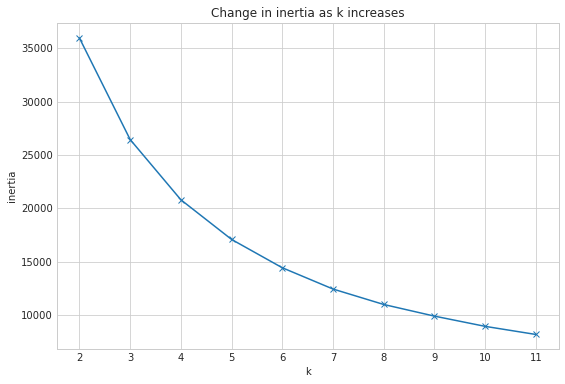

In [35]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

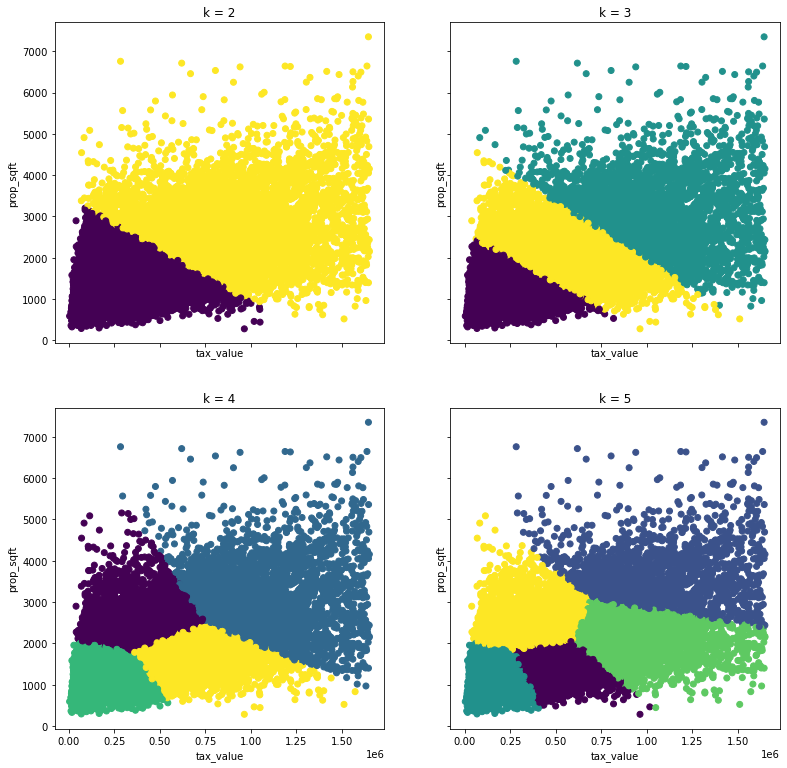

In [36]:
# tax value and square feet
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.tax_value, X.prop_sqft, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='tax_value', ylabel='prop_sqft')

Best to choose k = 4 based on elbow method and visualization

In [37]:
# Make the kmeans object
kmeans = KMeans(n_clusters=4, random_state=123)

# fit the kmeans model
kmeans.fit(X_scaled)

# use the thing
kmeans.predict(X_scaled)

array([0, 2, 2, ..., 2, 0, 1], dtype=int32)

In [38]:
X_scaled["cluster"] = kmeans.predict(X_scaled)

X_scaled.head()

tax_value  prop_sqft  cluster
11053337   0.220078  -0.109734        0
11184707  -1.110349   0.173101        2
12111920  -0.972227  -1.217169        2
12730510  -0.223591  -0.901138        2
11123078   0.492753   0.420083        0

In [39]:
cluster1 = X_scaled[X_scaled.cluster == 0]
cluster2 = X_scaled[X_scaled.cluster == 1]
cluster3 = X_scaled[X_scaled.cluster == 2]
cluster4 = X_scaled[X_scaled.cluster == 3]

In [40]:
X_scaled.groupby("cluster").describe().T

cluster                    0            1             2            3
tax_value count  9110.000000  5761.000000  17712.000000  3561.000000
          mean      0.591803    -0.173326     -0.663879     2.068470
          std       0.529122     0.552756      0.390157     0.876000
          min      -0.230983    -1.267762     -1.385246    -0.457260
          25%       0.192486    -0.614149     -1.023040     1.373100
          50%       0.467742    -0.197860     -0.666444     1.898179
          75%       0.869968     0.255214     -0.344760     2.706266
          max       3.818266     1.076567      0.404731     4.077344
prop_sqft count  9110.000000  5761.000000  17712.000000  3561.000000
          mean     -0.135744     0.997405     -0.627030     1.852436
          std       0.439980     0.584843      0.416364     1.093615
          min      -1.916952     0.138576     -1.906329    -1.007367
          25%      -0.447010     0.556852     -0.918733     1.103931
          50%      -0.136291     0.887489     -0.647517     1.717402
          75%       0.167789     1.303110     -0.328831     2.439758
          max       1.025587     4.553712      0.392198     7.468366

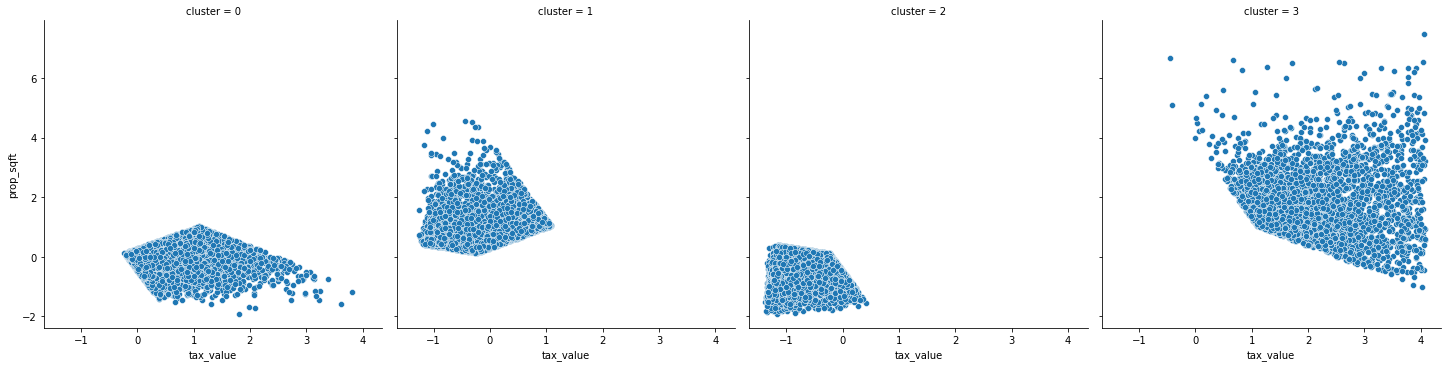

In [41]:
sns.relplot(x="tax_value", y="prop_sqft", col="cluster", data=X_scaled)


In [42]:
train, X_scaled, scaler, kmeans, centroids = create_cluster(train, X, 4)


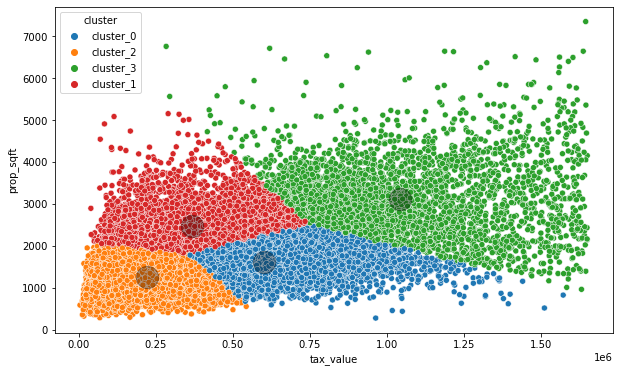

In [43]:
create_scatter_plot('tax_value','prop_sqft',train,kmeans, X_scaled, scaler)

In [44]:
X_scaled["cluster"] = kmeans.predict(X_scaled)

Text(0.5, 1.0, 'Do clusters reveal differences in tax value and error?')

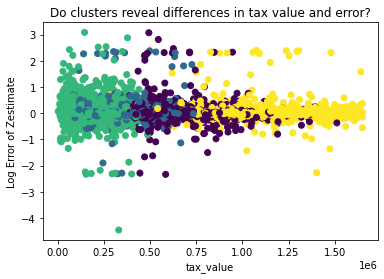

In [45]:
plt.scatter(x = "tax_value", y = "log_error", data = train, c = X_scaled.cluster)

plt.xlabel('tax_value')
plt.ylabel('Log Error of Zestimate')
plt.title("Do clusters reveal differences in tax value and error?")

Text(0.5, 1.0, 'Do clusters reveal differences in prop sqft and error?')

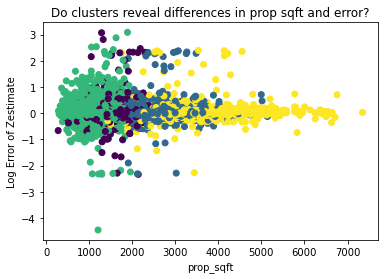

In [46]:
plt.scatter(x = "prop_sqft", y = "log_error", data = train, c = X_scaled.cluster)

plt.xlabel('prop_sqft')
plt.ylabel('Log Error of Zestimate')
plt.title("Do clusters reveal differences in prop sqft and error?")

# STATS prop_sqft and tax_value


In [47]:
null_hypothesis = "log_error is the same across all 4 clusters"
alternative_hypothesis = "The log_error is different on different days of the week"
alpha = 0.05 # Let's be 95% certain the result we see isn't due to chance/randomness

In [48]:
train.cluster.value_counts()

cluster_2    17712
cluster_0     9110
cluster_1     5761
cluster_3     3561
Name: cluster, dtype: int64

In [49]:
cluster1 = train[train.cluster == 'cluster_0'].log_error
cluster2 = train[train.cluster == 'cluster_1'].log_error
cluster3 = train[train.cluster == 'cluster_2'].log_error
cluster4 = train[train.cluster == 'cluster_3'].log_error

In [50]:
from scipy.stats import f_oneway

f, p = f_oneway(cluster1, cluster2, cluster3, cluster4)
p

1.0864542892380449e-10

In [51]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Evidence does not support the claim that tip averages are significantly different across days of the week.")

We reject the null hypothesis that log_error is the same across all 4 clusters
We move forward with the alternative hypothesis that The log_error is different on different days of the week


# T-test

In [64]:
clusters_population_mean = (cluster1.mean() + cluster2.mean() + cluster3.mean() + cluster4.mean())/4

In [65]:
clusters_population_mean

0.019572987498672416

In [73]:
t1, p1 = stats.ttest_1samp(cluster1, clusters_population_mean)
t1, p1

(-6.961344202982561, 3.6034416598601835e-12)

In [74]:
t2, p2 = stats.ttest_1samp(cluster2, clusters_population_mean)
t2, p2

(1.948287708969381, 0.05142904771138012)

In [75]:
t3, p3 = stats.ttest_1samp(cluster3, clusters_population_mean)
t3, p3

(-1.8028732135195737, 0.07142511989114933)

In [76]:
t4, p4 = stats.ttest_1samp(cluster4, clusters_population_mean)
t4, p4

(2.5875134834992943, 0.009706409974869839)

In [83]:
stats = {
    'Cluster': ['Cluster 1','Cluster 2','Cluster 3','Cluster 4'],
    't_statistic': [t1, t2, t3, t4],
    'p-value': [p1, p2, p3, p4]
}

In [84]:
T_test_results = pd.DataFrame(stats)

In [86]:
T_test_results.set_index('Cluster', inpla)

T_test_results

Cluster  t_statistic       p-value
0  Cluster 1    -6.961344  3.603442e-12
1  Cluster 2     1.948288  5.142905e-02
2  Cluster 3    -1.802873  7.142512e-02
3  Cluster 4     2.587513  9.706410e-03

### Clustering for acres and age

In [231]:
#start w/ 2 features
X = train[['acres', 'age']]
X.head()

acres   age
parcelid                
11053337  0.197865  60.0
11184707  0.165565  25.0
12111920  0.496924  52.0
12730510  0.139922  63.0
11123078  0.239187  20.0

In [232]:
#scale data
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

acres       age
11053337 -0.078971  0.432440
11184707 -0.286463 -1.070831
12111920  1.842140  0.088835
12730510 -0.451189  0.561292
11123078  0.186478 -1.285584

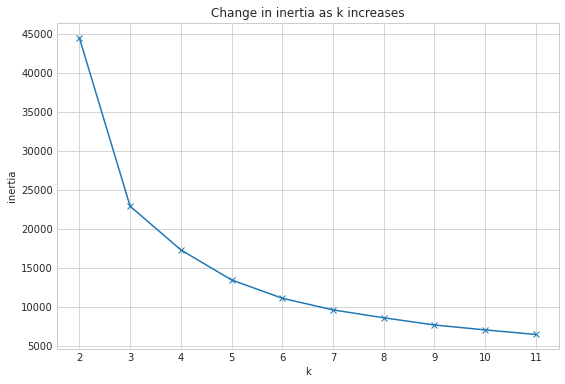

In [233]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

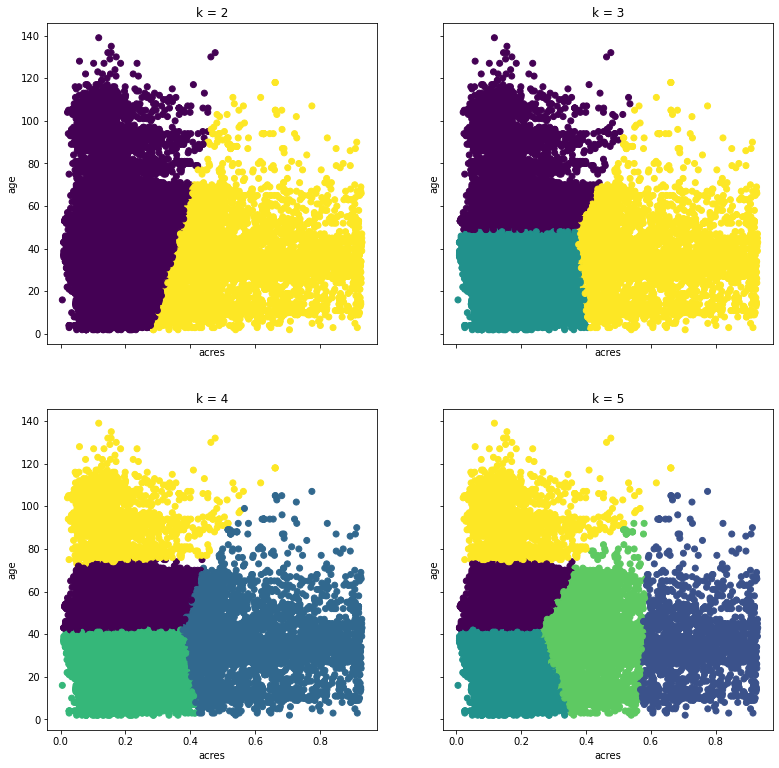

In [234]:
# tax value and square feet

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.acres, X.age, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='acres', ylabel='age')

Best to choose k = 4 based on elbow method and visualization

In [235]:
# Make the kmeans object
kmeans = KMeans(n_clusters=4)

# fit the kmeans model
kmeans.fit(X_scaled)

# use the thing
kmeans.predict(X_scaled)

array([0, 3, 1, ..., 3, 0, 2], dtype=int32)

In [236]:
X_scaled["cluster"] = kmeans.predict(X_scaled)
X_scaled.head()

acres       age  cluster
11053337 -0.078971  0.432440        0
11184707 -0.286463 -1.070831        3
12111920  1.842140  0.088835        1
12730510 -0.451189  0.561292        0
11123078  0.186478 -1.285584        3

In [237]:
cluster0 = X_scaled[X_scaled.cluster == 0]
cluster1 = X_scaled[X_scaled.cluster == 1]
cluster2 = X_scaled[X_scaled.cluster == 2]
cluster3 = X_scaled[X_scaled.cluster == 3]

In [238]:
X_scaled.groupby("cluster").describe().T

cluster                 0            1            2             3
acres count  16671.000000  3643.000000  4692.000000  11138.000000
      mean      -0.276913     2.533231    -0.371868     -0.257437
      std        0.407767     1.000869     0.428608      0.503084
      min       -1.285877     1.060099    -1.212731     -1.315224
      25%       -0.485771     1.649616    -0.610900     -0.598181
      50%       -0.350023     2.307117    -0.438359     -0.329377
      75%       -0.149610     3.310439    -0.255420      0.002433
      max        1.451930     4.620796     2.612825      1.316699
age   count  16671.000000  3643.000000  4692.000000  11138.000000
      mean       0.362489    -0.563299     1.666885     -1.060511
      std        0.347111     0.734664     0.447450      0.456478
      min       -0.340671    -2.058694     0.990797     -2.058694
      25%        0.088835    -0.984930     1.248501     -1.457386
      50%        0.432440    -0.598374     1.720957     -0.984930
      75%        0.647193    -0.147393     1.892760     -0.684275
      max        1.076699     2.923574     3.825536     -0.340671

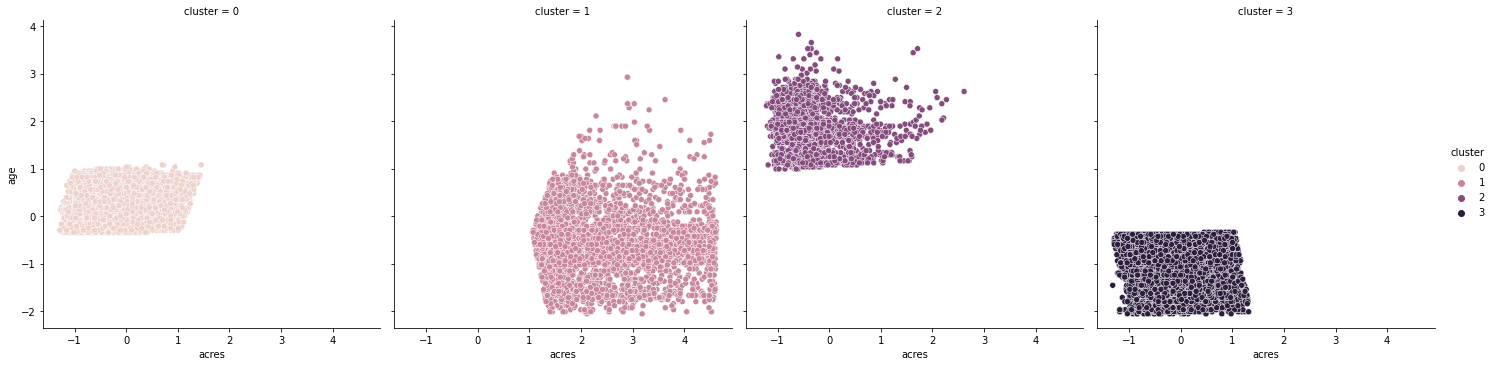

In [239]:
sns.relplot(x="acres", y="age", col="cluster", hue="cluster", data=X_scaled)


In [224]:
train, X_scaled, scaler, kmeans, centroids = create_cluster(train, X, 4)


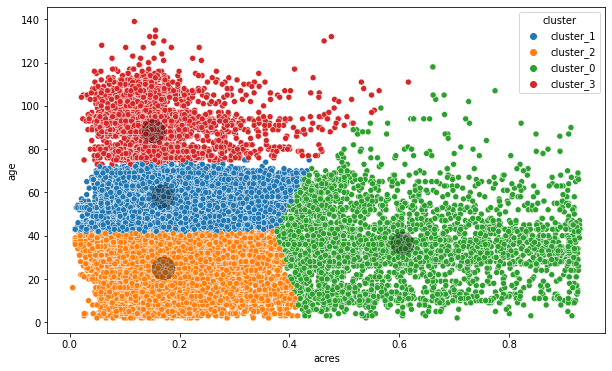

In [225]:
create_scatter_plot('acres','age',train,kmeans, X_scaled, scaler)

Text(0.5, 1.0, 'Do clusters reveal differences in acres and error?')

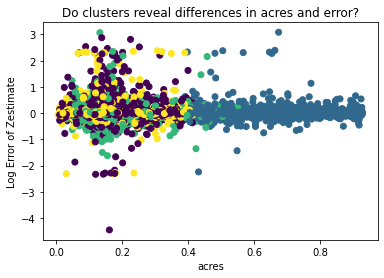

In [241]:
plt.scatter(x = "acres", y = "log_error", data = train, c = X_scaled.cluster)

plt.xlabel('acres')
plt.ylabel('Log Error of Zestimate')
plt.title("Do clusters reveal differences in acres and error?")

Text(0.5, 1.0, 'Do clusters reveal differences in age and error?')

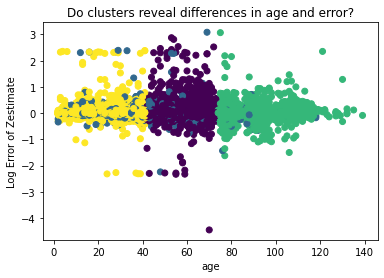

In [242]:
plt.scatter(x = "age", y = "log_error", data = train, c = X_scaled.cluster)

plt.xlabel('age')
plt.ylabel('Log Error of Zestimate')
plt.title("Do clusters reveal differences in age and error?")

### Clustering for latitude and longitude

In [261]:
#start w/ 2 features
X = train[['latitude', 'longitude']]
X.head()

latitude  longitude
parcelid                     
11053337  0.342330  -1.184758
11184707  0.346181  -1.181858
12111920  0.341421  -1.181280
12730510  0.339189  -1.180198
11123078  0.344540  -1.184890

In [262]:
#scale data
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

latitude  longitude
11053337  0.855155  -0.770103
11184707  2.283472   0.013444
12111920  0.518004   0.169464
12730510 -0.309746   0.461746
11123078  1.674694  -0.805833

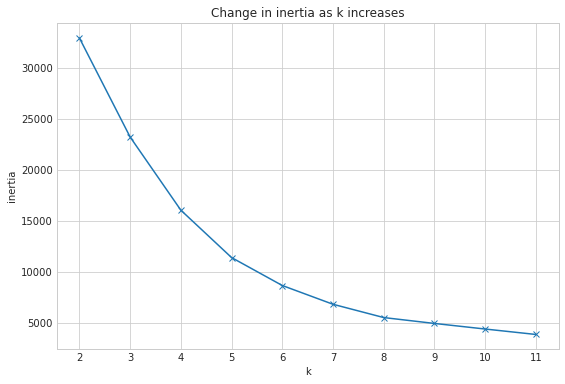

In [263]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

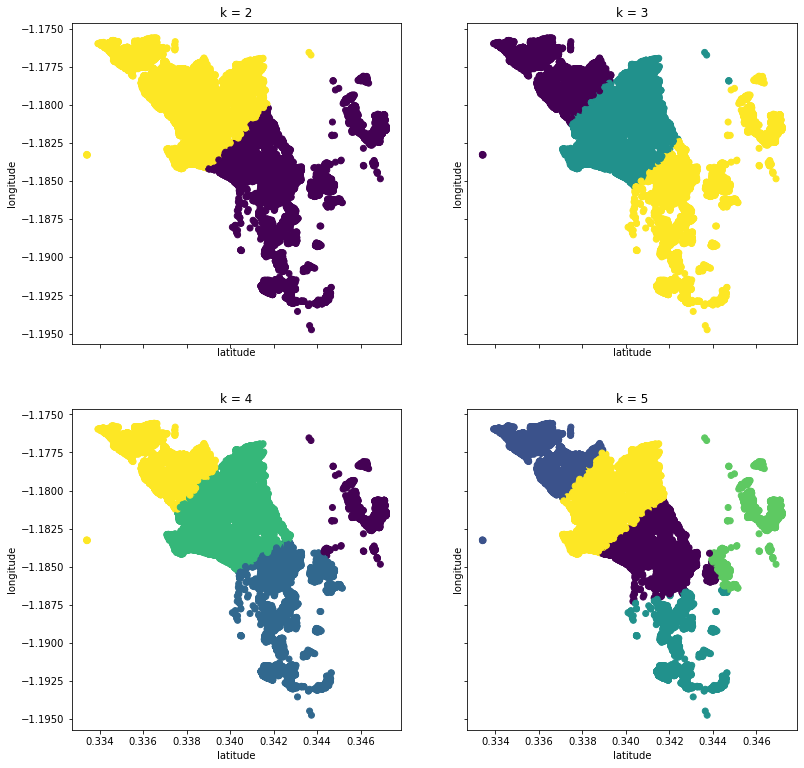

In [264]:
# tax value and square feet

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.latitude, X.longitude, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='latitude', ylabel='longitude')

### Takeaway
- k=4?

In [265]:
# Make the kmeans object
kmeans = KMeans(n_clusters=4)

# fit the kmeans model
kmeans.fit(X_scaled)

# use the thing
kmeans.predict(X_scaled)

array([0, 3, 2, ..., 1, 2, 2], dtype=int32)

In [266]:
X_scaled["cluster"] = kmeans.predict(X_scaled)
X_scaled.head()

latitude  longitude  cluster
11053337  0.855155  -0.770103        0
11184707  2.283472   0.013444        3
12111920  0.518004   0.169464        2
12730510 -0.309746   0.461746        2
11123078  1.674694  -0.805833        0

In [267]:
cluster0 = X_scaled[X_scaled.cluster == 0]
cluster1 = X_scaled[X_scaled.cluster == 1]
cluster2 = X_scaled[X_scaled.cluster == 2]
cluster3 = X_scaled[X_scaled.cluster == 3]

In [268]:
X_scaled.groupby("cluster").describe().T

cluster                    0            1             2            3
latitude  count  7516.000000  9907.000000  16709.000000  2012.000000
          mean      0.902026    -1.137191     -0.010193     2.314532
          std       0.323096     0.439815      0.465384     0.241552
          min       0.028952    -2.454349     -1.088340     1.334816
          25%       0.676818    -1.437026     -0.387545     2.108246
          50%       0.833081    -1.142366      0.037556     2.374546
          75%       1.017792    -0.795337      0.369828     2.526727
          max       1.902731    -0.262285      1.020755     2.655197
longitude count  7516.000000  9907.000000  16709.000000  2012.000000
          mean     -1.464830     1.019298      0.035679     0.156719
          std       0.731557     0.363732      0.499737     0.271240
          min      -3.470189    -0.373540     -0.903374    -0.792161
          25%      -1.967494     0.720001     -0.379553     0.010011
          50%      -1.170771     1.026260     -0.006361     0.148776
          75%      -0.864351     1.328983      0.366675     0.306340
          max      -0.405769     1.710753      1.346410     1.450248

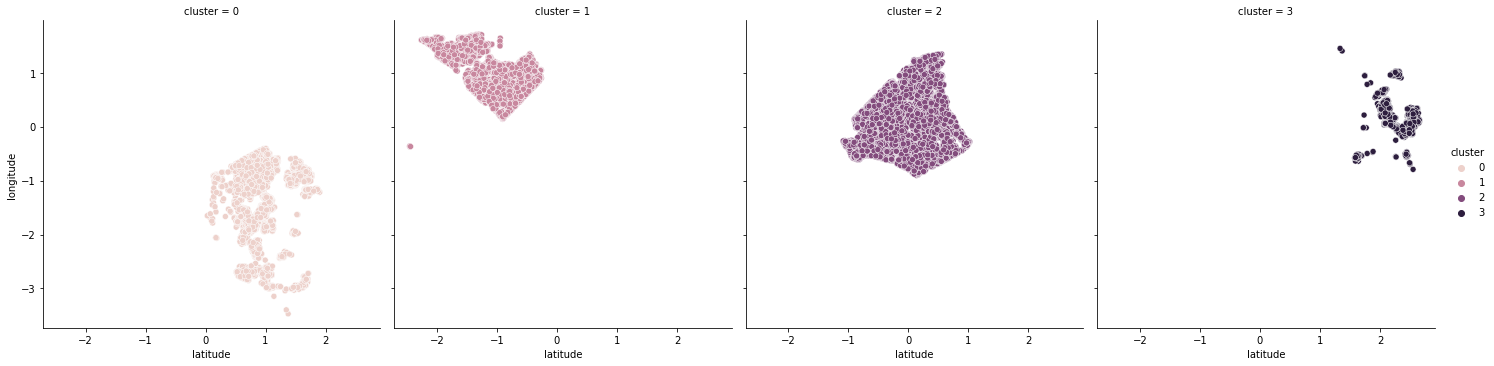

In [269]:
sns.relplot(x="latitude", y="longitude", col="cluster", hue="cluster", data=X_scaled)


In [258]:
train, X_scaled, scaler, kmeans, centroids = create_cluster(train, X, 4)


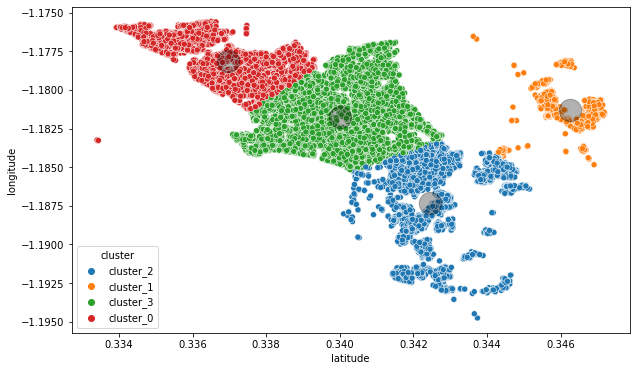

In [259]:
create_scatter_plot('latitude','longitude',train,kmeans, X_scaled, scaler)

AttributeError: 'DataFrame' object has no attribute 'cluster'

Text(0.5, 1.0, 'Do clusters reveal differences in latitude and error?')

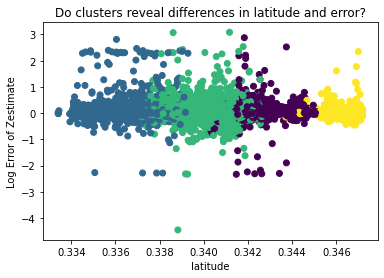

In [270]:
plt.scatter(x = "latitude", y = "log_error", data = train, c = X_scaled.cluster)

plt.xlabel('latitude')
plt.ylabel('Log Error of Zestimate')
plt.title("Do clusters reveal differences in latitude and error?")

Text(0.5, 1.0, 'Do clusters reveal differences in longitude and error?')

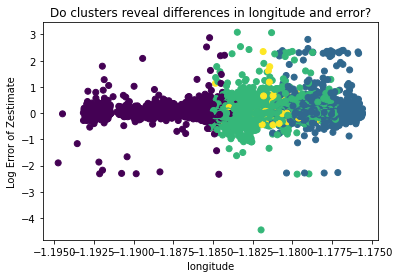

In [271]:
plt.scatter(x = "longitude", y = "log_error", data = train, c = X_scaled.cluster)

plt.xlabel('longitude')
plt.ylabel('Log Error of Zestimate')
plt.title("Do clusters reveal differences in longitude and error?")

In [ ]:
#set up X inputs and y target variable for each split for modeling
X_train = train.drop(columns=['log_error'])
y_train = train.log_error

X_validate = validate.drop(columns=['log_error'])
y_validate = validate.log_error

X_test = test.drop(columns=['log_error'])
y_test = test.log_error